In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch

os.environ['CXX'] = 'g++'

from splice.splice import SPLICE
# from splice.splice_dcca import SPLICE as SPLICE_DCCA
from splice.base import decoder
from splice.nonalternating_baseline import DCCA

from geomloss import SamplesLoss

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from sklearn.neighbors import NearestNeighbors

[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


### Ring with hole at edge

In [2]:
from scipy.ndimage import gaussian_filter1d

mult = np.ones(int(2*np.pi*1000+1))
start_ind = int(np.pi*1000)
mult[int(1*np.pi*1000):int(1.5*np.pi*1000)] = 0.5 + 0.5*(np.abs(np.linspace(-1, 1, int(0.5*np.pi*1000)+1)))

mult = gaussian_filter1d(mult, 100)

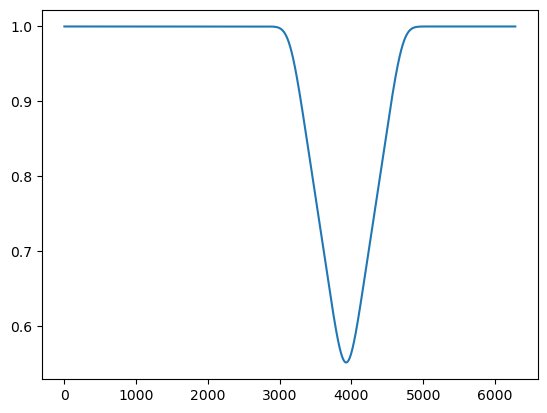

In [3]:
plt.plot(mult)

In [4]:
# generate ground truth latents
n_samples = 20000

view_a = np.zeros((n_samples, 2))
view_b = np.zeros((n_samples, 2))

theta = 2*np.pi*np.random.rand(n_samples)
r_a = np.random.rand(n_samples) + 0.5
r_b = np.random.rand(n_samples) * mult[(theta*1000).astype("int")] + 0.5

# generate observations
view_a[:,0] = r_a * np.cos(theta)
view_a[:,1] = r_a * np.sin(theta)

view_b[:,0] = r_b * np.cos(theta)
view_b[:,1] = r_b * np.sin(theta)


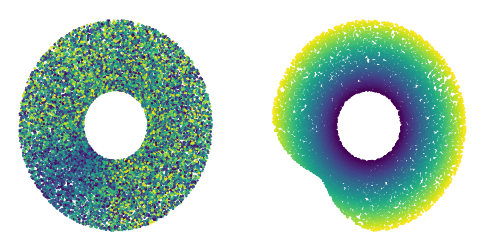

In [5]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.axis("off")
plt.scatter(view_a[:, 0], view_a[:, 1], c=r_b, s=0.5)

plt.subplot(1,2,2)
plt.axis("off")
plt.scatter(view_b[:, 0], view_b[:, 1], c=r_b, s=0.5)

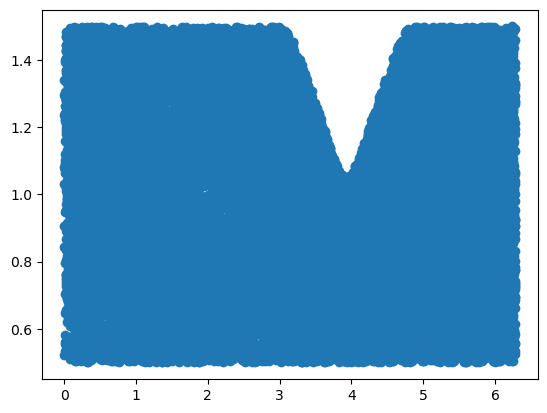

In [6]:
plt.scatter(theta, r_b)

In [7]:
a_train = torch.Tensor(view_a[:12800]).to(device)
b_train = torch.Tensor(view_b[:12800]).to(device)
a_validation = torch.Tensor(view_a[12800:16000]).to(device)
b_validation = torch.Tensor(view_b[12800:16000]).to(device)


model = SPLICE(
    n_a = 2,
    n_b = 2,
    n_shared = 2,
    n_private_a= 1,
    n_private_b= 1,
    enc_layers=[64]*5,
    dec_layers=[64]*5,
    msr_layers=[64]*5,
    device=device,
).to(device)
filepath = "../results/models/r-theta/r-theta_ring_smooth-hole.pt"

In [142]:
model.fit(
    a_train,
    b_train,
    a_validation,
    b_validation,
    epochs=500,
    lr=1e-3,
    batch_size=128,
    model_filepath=filepath,
    msr_iter_normal=5,
    msr_iter_restart=100,
    disent_start=75,
    c_disent=1,
    checkpoint_freq=5,
    end_factor=1/50,
)

1/500 |                                          |   0% [00:02<20:20,  2.45s/it]

Epoch 0:        A reconstruction: 0.0989 | 0.0312 	 B reconstruction: 0.0867 | 0.0298 	 Disentangling: 0.0000 | 0.0076 	 Measurement: 0.0000 | 2.2697


6/500 |▌                                         |   1% [00:16<22:50,  2.77s/it]

Epoch 5:        A reconstruction: 0.0065 | 0.0061 	 B reconstruction: 0.0051 | 0.0044 	 Disentangling: 0.0000 | 0.4608 	 Measurement: 0.0000 | 2.5316


11/500 |▉                                        |   2% [00:29<21:33,  2.65s/it]

Epoch 10:        A reconstruction: 0.0040 | 0.0028 	 B reconstruction: 0.0026 | 0.0031 	 Disentangling: 0.0000 | 3.2722 	 Measurement: 0.0000 | 5.7278


16/500 |█▎                                       |   3% [00:41<20:01,  2.48s/it]

Epoch 15:        A reconstruction: 0.0023 | 0.0022 	 B reconstruction: 0.0021 | 0.0019 	 Disentangling: 0.0000 | 7.6796 	 Measurement: 0.0000 | 11.5773


21/500 |█▋                                       |   4% [00:55<22:17,  2.79s/it]

Epoch 20:        A reconstruction: 0.0020 | 0.0020 	 B reconstruction: 0.0016 | 0.0016 	 Disentangling: 0.0000 | 9.2927 	 Measurement: 0.0000 | 13.6682


26/500 |██▏                                      |   5% [01:09<21:12,  2.69s/it]

Epoch 25:        A reconstruction: 0.0015 | 0.0023 	 B reconstruction: 0.0010 | 0.0010 	 Disentangling: 0.0000 | 29.3969 	 Measurement: 0.0000 | 38.2978


31/500 |██▌                                      |   6% [01:22<20:24,  2.61s/it]

Epoch 30:        A reconstruction: 0.0012 | 0.0010 	 B reconstruction: 0.0010 | 0.0012 	 Disentangling: 0.0000 | 38.1279 	 Measurement: 0.0000 | 50.0278


36/500 |██▉                                      |   7% [01:37<23:05,  2.99s/it]

Epoch 35:        A reconstruction: 0.0017 | 0.0011 	 B reconstruction: 0.0009 | 0.0011 	 Disentangling: 0.0000 | 27.0499 	 Measurement: 0.0000 | 35.7671


41/500 |███▎                                     |   8% [01:49<19:38,  2.57s/it]

Epoch 40:        A reconstruction: 0.0010 | 0.0017 	 B reconstruction: 0.0008 | 0.0009 	 Disentangling: 0.0000 | 66.8644 	 Measurement: 0.0000 | 86.2226


46/500 |███▊                                     |   9% [02:02<20:47,  2.75s/it]

Epoch 45:        A reconstruction: 0.0010 | 0.0009 	 B reconstruction: 0.0014 | 0.0019 	 Disentangling: 0.0000 | 71.9731 	 Measurement: 0.0000 | 94.1958


51/500 |████▏                                    |  10% [02:17<21:22,  2.86s/it]

Epoch 50:        A reconstruction: 0.0014 | 0.0021 	 B reconstruction: 0.0012 | 0.0042 	 Disentangling: 0.0000 | 290.1915 	 Measurement: 0.0000 | 399.6628


56/500 |████▌                                    |  11% [02:29<19:37,  2.65s/it]

Epoch 55:        A reconstruction: 0.0012 | 0.0015 	 B reconstruction: 0.0011 | 0.0010 	 Disentangling: 0.0000 | 418.0380 	 Measurement: 0.0000 | 602.9530


61/500 |█████                                    |  12% [02:44<20:39,  2.82s/it]

Epoch 60:        A reconstruction: 0.0005 | 0.0006 	 B reconstruction: 0.0008 | 0.0009 	 Disentangling: 0.0000 | 361.0773 	 Measurement: 0.0000 | 545.3398


66/500 |█████▍                                   |  13% [02:56<18:27,  2.55s/it]

Epoch 65:        A reconstruction: 0.0022 | 0.0013 	 B reconstruction: 0.0010 | 0.0015 	 Disentangling: 0.0000 | 832.8430 	 Measurement: 0.0000 | 1324.8653


71/500 |█████▊                                   |  14% [03:10<20:05,  2.81s/it]

Epoch 70:        A reconstruction: 0.0010 | 0.0008 	 B reconstruction: 0.0007 | 0.0005 	 Disentangling: 0.0000 | 650.2957 	 Measurement: 0.0000 | 1138.6559


76/500 |█████▉                                 |  15% [05:23<4:30:09, 38.23s/it]

Epoch 75:        A reconstruction: 0.0688 | 0.0434 	 B reconstruction: 0.0478 | 0.0379 	 Disentangling: 0.1441 | 0.0000 	 Measurement: 0.0000 | 2.0310
saving new best model


81/500 |██████▎                                |  16% [06:24<1:57:01, 16.76s/it]

Epoch 80:        A reconstruction: 0.0425 | 0.0426 	 B reconstruction: 0.0389 | 0.0376 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0078
saving new best model


86/500 |██████▋                                |  17% [07:27<1:31:34, 13.27s/it]

Epoch 85:        A reconstruction: 0.0426 | 0.0427 	 B reconstruction: 0.0384 | 0.0375 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0127
saving new best model


91/500 |███████                                |  18% [08:29<1:26:11, 12.64s/it]

Epoch 90:        A reconstruction: 0.0424 | 0.0431 	 B reconstruction: 0.0382 | 0.0381 	 Disentangling: 0.0003 | 0.0000 	 Measurement: 0.0000 | 2.0039


96/500 |███████▍                               |  19% [09:31<1:24:56, 12.61s/it]

Epoch 95:        A reconstruction: 0.0422 | 0.0425 	 B reconstruction: 0.0378 | 0.0376 	 Disentangling: 0.0004 | 0.0011 	 Measurement: 0.0000 | 2.0031
saving new best model


101/500 |███████▋                              |  20% [10:33<1:22:37, 12.42s/it]

Epoch 100:        A reconstruction: 0.0426 | 0.0425 	 B reconstruction: 0.0388 | 0.0415 	 Disentangling: 0.0003 | 0.0000 	 Measurement: 0.0000 | 2.0055


106/500 |████████                              |  21% [11:36<1:22:38, 12.58s/it]

Epoch 105:        A reconstruction: 0.0422 | 0.0425 	 B reconstruction: 0.0379 | 0.0372 	 Disentangling: 0.0005 | 0.0000 	 Measurement: 0.0000 | 2.0048
saving new best model


111/500 |████████▍                             |  22% [12:39<1:21:12, 12.53s/it]

Epoch 110:        A reconstruction: 0.0425 | 0.0425 	 B reconstruction: 0.0382 | 0.0377 	 Disentangling: 0.0015 | 0.0001 	 Measurement: 0.0000 | 2.0146


116/500 |████████▊                             |  23% [13:42<1:21:17, 12.70s/it]

Epoch 115:        A reconstruction: 0.0423 | 0.0429 	 B reconstruction: 0.0376 | 0.0438 	 Disentangling: 0.0019 | 0.0011 	 Measurement: 0.0000 | 2.0150


121/500 |█████████▏                            |  24% [14:44<1:19:08, 12.53s/it]

Epoch 120:        A reconstruction: 0.0423 | 0.0428 	 B reconstruction: 0.0379 | 0.0366 	 Disentangling: 0.0002 | 0.0006 	 Measurement: 0.0000 | 1.9838
saving new best model


126/500 |█████████▌                            |  25% [15:47<1:19:28, 12.75s/it]

Epoch 125:        A reconstruction: 0.0422 | 0.0425 	 B reconstruction: 0.0302 | 0.0201 	 Disentangling: 0.0021 | 0.0013 	 Measurement: 0.0000 | 2.0320
saving new best model


131/500 |█████████▉                            |  26% [16:49<1:16:24, 12.42s/it]

Epoch 130:        A reconstruction: 0.0422 | 0.0426 	 B reconstruction: 0.0006 | 0.0008 	 Disentangling: 0.0004 | 0.0000 	 Measurement: 0.0000 | 2.0052
saving new best model


136/500 |██████████▎                           |  27% [17:51<1:16:04, 12.54s/it]

Epoch 135:        A reconstruction: 0.0423 | 0.0422 	 B reconstruction: 0.0007 | 0.0003 	 Disentangling: 0.0002 | 0.0000 	 Measurement: 0.0000 | 2.0005
saving new best model


141/500 |██████████▋                           |  28% [18:54<1:15:53, 12.68s/it]

Epoch 140:        A reconstruction: 0.0423 | 0.0427 	 B reconstruction: 0.0003 | 0.0003 	 Disentangling: 0.0001 | 0.0001 	 Measurement: 0.0000 | 2.0047


146/500 |███████████                           |  29% [19:56<1:13:24, 12.44s/it]

Epoch 145:        A reconstruction: 0.0422 | 0.0430 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0011


151/500 |███████████▍                          |  30% [20:58<1:13:13, 12.59s/it]

Epoch 150:        A reconstruction: 0.0422 | 0.0424 	 B reconstruction: 0.0001 | 0.0002 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0044


156/500 |███████████▊                          |  31% [22:01<1:11:28, 12.47s/it]

Epoch 155:        A reconstruction: 0.0422 | 0.0429 	 B reconstruction: 0.0001 | 0.0005 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0111


161/500 |████████████▏                         |  32% [23:04<1:11:06, 12.58s/it]

Epoch 160:        A reconstruction: 0.0422 | 0.0425 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0046


166/500 |████████████▌                         |  33% [24:06<1:09:50, 12.55s/it]

Epoch 165:        A reconstruction: 0.0422 | 0.0428 	 B reconstruction: 0.0001 | 0.0000 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0040


171/500 |████████████▉                         |  34% [25:09<1:09:13, 12.62s/it]

Epoch 170:        A reconstruction: 0.0421 | 0.0432 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0043


176/500 |█████████████▍                        |  35% [26:11<1:08:05, 12.61s/it]

Epoch 175:        A reconstruction: 0.0421 | 0.0424 	 B reconstruction: 0.0019 | 0.0060 	 Disentangling: 0.0010 | 0.0001 	 Measurement: 0.0000 | 2.0004


181/500 |█████████████▊                        |  36% [27:14<1:07:22, 12.67s/it]

Epoch 180:        A reconstruction: 0.0421 | 0.0427 	 B reconstruction: 0.0005 | 0.0001 	 Disentangling: 0.0002 | 0.0000 	 Measurement: 0.0000 | 2.0011


186/500 |██████████████▏                       |  37% [28:16<1:04:52, 12.40s/it]

Epoch 185:        A reconstruction: 0.0420 | 0.0431 	 B reconstruction: 0.0002 | 0.0002 	 Disentangling: 0.0001 | 0.0000 	 Measurement: 0.0000 | 2.0087


191/500 |██████████████▌                       |  38% [29:18<1:04:42, 12.56s/it]

Epoch 190:        A reconstruction: 0.0421 | 0.0424 	 B reconstruction: 0.0001 | 0.0000 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0028
saving new best model


196/500 |██████████████▉                       |  39% [30:22<1:04:01, 12.64s/it]

Epoch 195:        A reconstruction: 0.0420 | 0.0424 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0017
saving new best model


201/500 |███████████████▎                      |  40% [31:24<1:02:27, 12.53s/it]

Epoch 200:        A reconstruction: 0.0421 | 0.0424 	 B reconstruction: 0.0002 | 0.0000 	 Disentangling: 0.0003 | 0.0000 	 Measurement: 0.0000 | 2.0013
saving new best model


206/500 |███████████████▋                      |  41% [32:26<1:01:16, 12.51s/it]

Epoch 205:        A reconstruction: 0.0420 | 0.0424 	 B reconstruction: 0.0003 | 0.0001 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0020


211/500 |████████████████                      |  42% [33:29<1:00:29, 12.56s/it]

Epoch 210:        A reconstruction: 0.0421 | 0.0425 	 B reconstruction: 0.0003 | 0.0022 	 Disentangling: 0.0002 | 0.0000 	 Measurement: 0.0000 | 2.0013


216/500 |█████████████████▎                      |  43% [34:31<59:00, 12.47s/it]

Epoch 215:        A reconstruction: 0.0420 | 0.0424 	 B reconstruction: 0.0001 | 0.0000 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0018
saving new best model


221/500 |█████████████████▋                      |  44% [35:33<57:50, 12.44s/it]

Epoch 220:        A reconstruction: 0.0420 | 0.0426 	 B reconstruction: 0.0002 | 0.0000 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0058


226/500 |██████████████████                      |  45% [36:36<57:46, 12.65s/it]

Epoch 225:        A reconstruction: 0.0421 | 0.0428 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0001 | 0.0000 	 Measurement: 0.0000 | 2.0025


231/500 |██████████████████▍                     |  46% [37:40<56:53, 12.69s/it]

Epoch 230:        A reconstruction: 0.0419 | 0.0427 	 B reconstruction: 0.0003 | 0.0002 	 Disentangling: 0.0002 | 0.0014 	 Measurement: 0.0000 | 2.0034


236/500 |██████████████████▉                     |  47% [38:42<55:25, 12.60s/it]

Epoch 235:        A reconstruction: 0.0420 | 0.0425 	 B reconstruction: 0.0002 | 0.0000 	 Disentangling: 0.0001 | 0.0000 	 Measurement: 0.0000 | 2.0007


241/500 |███████████████████▎                    |  48% [39:45<54:08, 12.54s/it]

Epoch 240:        A reconstruction: 0.0419 | 0.0424 	 B reconstruction: 0.0012 | 0.0000 	 Disentangling: 0.0004 | 0.0000 	 Measurement: 0.0000 | 2.0023


246/500 |███████████████████▋                    |  49% [40:47<53:02, 12.53s/it]

Epoch 245:        A reconstruction: 0.0420 | 0.0422 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0001 | 0.0001 	 Measurement: 0.0000 | 2.0035
saving new best model


251/500 |████████████████████                    |  50% [41:50<51:46, 12.47s/it]

Epoch 250:        A reconstruction: 0.0419 | 0.0424 	 B reconstruction: 0.0001 | 0.0000 	 Disentangling: 0.0001 | 0.0000 	 Measurement: 0.0000 | 2.0019


256/500 |████████████████████▍                   |  51% [42:52<50:34, 12.44s/it]

Epoch 255:        A reconstruction: 0.0419 | 0.0425 	 B reconstruction: 0.0001 | 0.0002 	 Disentangling: 0.0001 | 0.0000 	 Measurement: 0.0000 | 2.0043


261/500 |████████████████████▉                   |  52% [43:55<50:08, 12.59s/it]

Epoch 260:        A reconstruction: 0.0419 | 0.0424 	 B reconstruction: 0.0001 | 0.0000 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0020


266/500 |█████████████████████▎                  |  53% [44:56<48:16, 12.38s/it]

Epoch 265:        A reconstruction: 0.0420 | 0.0424 	 B reconstruction: 0.0006 | 0.0007 	 Disentangling: 0.0004 | 0.0000 	 Measurement: 0.0000 | 2.0027


271/500 |█████████████████████▋                  |  54% [45:58<47:16, 12.39s/it]

Epoch 270:        A reconstruction: 0.0420 | 0.0423 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0033


276/500 |██████████████████████                  |  55% [47:01<46:53, 12.56s/it]

Epoch 275:        A reconstruction: 0.0419 | 0.0424 	 B reconstruction: 0.0001 | 0.0000 	 Disentangling: 0.0002 | 0.0003 	 Measurement: 0.0000 | 2.0014


281/500 |██████████████████████▍                 |  56% [48:01<44:50, 12.29s/it]

Epoch 280:        A reconstruction: 0.0419 | 0.0423 	 B reconstruction: 0.0000 | 0.0001 	 Disentangling: 0.0002 | 0.0000 	 Measurement: 0.0000 | 2.0020


286/500 |██████████████████████▉                 |  57% [49:03<44:11, 12.39s/it]

Epoch 285:        A reconstruction: 0.0419 | 0.0423 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0023


291/500 |███████████████████████▎                |  58% [50:07<44:18, 12.72s/it]

Epoch 290:        A reconstruction: 0.0419 | 0.0424 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0000 | 0.0002 	 Measurement: 0.0000 | 2.0079


296/500 |███████████████████████▋                |  59% [51:10<43:07, 12.68s/it]

Epoch 295:        A reconstruction: 0.0418 | 0.0425 	 B reconstruction: 0.0001 | 0.0000 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0011


301/500 |████████████████████████                |  60% [52:12<40:56, 12.34s/it]

Epoch 300:        A reconstruction: 0.0418 | 0.0425 	 B reconstruction: 0.0001 | 0.0000 	 Disentangling: 0.0000 | 0.0001 	 Measurement: 0.0000 | 2.0020


306/500 |████████████████████████▍               |  61% [53:15<40:50, 12.63s/it]

Epoch 305:        A reconstruction: 0.0419 | 0.0424 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0039


311/500 |████████████████████████▉               |  62% [54:17<39:01, 12.39s/it]

Epoch 310:        A reconstruction: 0.0419 | 0.0423 	 B reconstruction: 0.0000 | 0.0001 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0004


316/500 |█████████████████████████▎              |  63% [55:19<37:51, 12.34s/it]

Epoch 315:        A reconstruction: 0.0418 | 0.0422 	 B reconstruction: 0.0011 | 0.0000 	 Disentangling: 0.0002 | 0.0001 	 Measurement: 0.0000 | 2.0013
saving new best model


321/500 |█████████████████████████▋              |  64% [56:21<37:11, 12.47s/it]

Epoch 320:        A reconstruction: 0.0418 | 0.0424 	 B reconstruction: 0.0002 | 0.0006 	 Disentangling: 0.0007 | 0.0000 	 Measurement: 0.0000 | 2.0025


326/500 |██████████████████████████              |  65% [57:24<36:23, 12.55s/it]

Epoch 325:        A reconstruction: 0.0419 | 0.0422 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0018
saving new best model


331/500 |██████████████████████████▍             |  66% [58:27<35:27, 12.59s/it]

Epoch 330:        A reconstruction: 0.0418 | 0.0424 	 B reconstruction: 0.0001 | 0.0000 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0004


336/500 |██████████████████████████▉             |  67% [59:30<34:33, 12.64s/it]

Epoch 335:        A reconstruction: 0.0418 | 0.0423 	 B reconstruction: 0.0001 | 0.0000 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0032


341/500 |█████████████████████████▉            |  68% [1:00:33<33:27, 12.62s/it]

Epoch 340:        A reconstruction: 0.0418 | 0.0422 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0001 | 0.0000 	 Measurement: 0.0000 | 2.0088
saving new best model


346/500 |██████████████████████████▎           |  69% [1:01:33<31:06, 12.12s/it]

Epoch 345:        A reconstruction: 0.0417 | 0.0425 	 B reconstruction: 0.0001 | 0.0002 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0015


351/500 |██████████████████████████▋           |  70% [1:02:35<31:18, 12.61s/it]

Epoch 350:        A reconstruction: 0.0418 | 0.0425 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0037


356/500 |███████████████████████████           |  71% [1:03:38<30:18, 12.63s/it]

Epoch 355:        A reconstruction: 0.0417 | 0.0424 	 B reconstruction: 0.0000 | 0.0001 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0017


361/500 |███████████████████████████▍          |  72% [1:04:41<29:25, 12.70s/it]

Epoch 360:        A reconstruction: 0.0418 | 0.0422 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0008


366/500 |███████████████████████████▊          |  73% [1:05:44<28:15, 12.65s/it]

Epoch 365:        A reconstruction: 0.0417 | 0.0422 	 B reconstruction: 0.0001 | 0.0000 	 Disentangling: 0.0001 | 0.0000 	 Measurement: 0.0000 | 2.0023


371/500 |████████████████████████████▏         |  74% [1:06:47<26:57, 12.54s/it]

Epoch 370:        A reconstruction: 0.0417 | 0.0422 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0005


376/500 |████████████████████████████▌         |  75% [1:07:50<26:13, 12.69s/it]

Epoch 375:        A reconstruction: 0.0417 | 0.0424 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0007


381/500 |████████████████████████████▉         |  76% [1:08:53<25:01, 12.62s/it]

Epoch 380:        A reconstruction: 0.0417 | 0.0423 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0066


386/500 |█████████████████████████████▎        |  77% [1:09:55<23:52, 12.56s/it]

Epoch 385:        A reconstruction: 0.0417 | 0.0423 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0006


391/500 |█████████████████████████████▋        |  78% [1:10:58<23:00, 12.67s/it]

Epoch 390:        A reconstruction: 0.0417 | 0.0422 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0001 | 0.0000 	 Measurement: 0.0000 | 2.0021


396/500 |██████████████████████████████        |  79% [1:11:59<21:15, 12.27s/it]

Epoch 395:        A reconstruction: 0.0416 | 0.0423 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0012


401/500 |██████████████████████████████▍       |  80% [1:13:02<20:51, 12.64s/it]

Epoch 400:        A reconstruction: 0.0416 | 0.0422 	 B reconstruction: 0.0000 | 0.0001 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0015


406/500 |██████████████████████████████▊       |  81% [1:14:05<19:34, 12.49s/it]

Epoch 405:        A reconstruction: 0.0416 | 0.0423 	 B reconstruction: 0.0001 | 0.0000 	 Disentangling: 0.0001 | 0.0027 	 Measurement: 0.0000 | 2.0161


407/500 |██████████████████████████████▉       |  81% [1:14:23<16:59, 10.97s/it]


KeyboardInterrupt: 

In [46]:
model.load_state_dict(torch.load(filepath))
z_a, z_b2a, z_a2b, z_b, m_a, m_b, a_hat, b_hat = model(torch.Tensor(view_a).to(device), torch.Tensor(view_b).to(device))

z_a = z_a.detach().cpu().numpy()
z_b = z_b.detach().cpu().numpy()
z_a2b = z_a2b.detach().cpu().numpy()
z_b2a = z_b2a.detach().cpu().numpy()
a_hat = a_hat.detach().cpu().numpy()
b_hat = b_hat.detach().cpu().numpy()

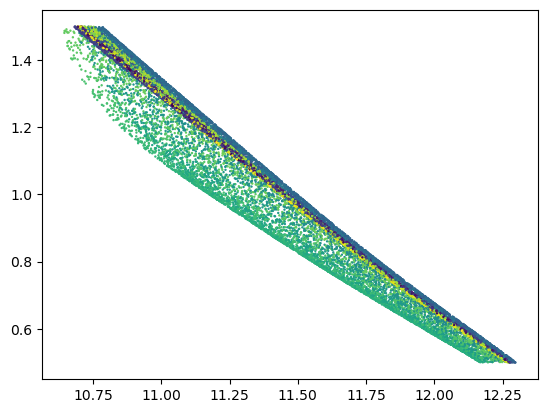

In [47]:
plt.scatter(z_b[:, 0], r_b, c=theta, s=0.5);

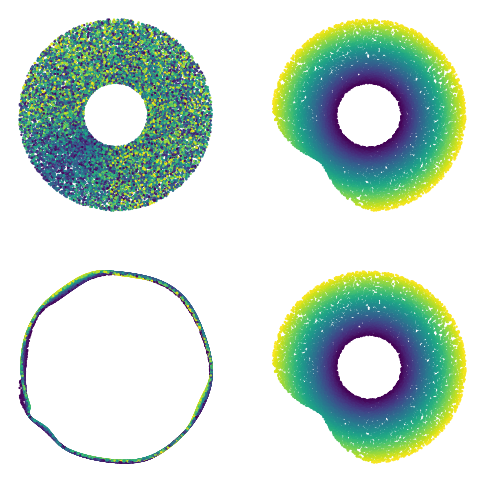

In [11]:
plt.figure(figsize=(6,6))
plt.subplot(2,2,1)
plt.axis("off")
plt.scatter(view_a[:, 0], view_a[:, 1], c=r_b, s=0.5)

plt.subplot(2,2,2)
plt.axis("off")
plt.scatter(view_b[:, 0], view_b[:, 1], c=r_b, s=0.5)

plt.subplot(2,2,3)
plt.axis("off")
plt.scatter(a_hat[:, 0], a_hat[:, 1], c=r_b, s=0.5)

plt.subplot(2,2,4)
plt.axis("off")
plt.scatter(b_hat[:, 0], b_hat[:, 1], c=r_b, s=0.5)

In [12]:
radii = np.arange(0.5, 1.7, 0.2)  # From 0.5 to 1.5 inclusive with step 0.2
r_contours = []

for radius in radii:
    # Find the index of the closest r_b to our target radius
    r_ind = np.argsort(np.abs(r_b - radius))[0]
    
    # Get the latent representations
    theta_lat = model.F_a2b(torch.Tensor(view_a).to(device))
    r_lat = model.F_b(torch.Tensor(view_b[r_ind,:]).to(device))
    r_lat = r_lat.repeat(theta_lat.size(0), 1)
    
    # Reconstruct from the latent space
    contour = model.G_b(torch.cat([r_lat, theta_lat], dim=1))
    contour = contour.detach().cpu().numpy()
    
    r_contours.append(contour)

# Now let's create contour lines for different theta values
thetas = np.arange(0, 2*np.pi, np.pi/4)  # From 0 to 2π in increments of π/4
theta_contours = []

for angle in thetas:
    # Find the index of the closest theta to our target angle
    theta_ind = np.argsort(np.abs(theta - angle))[0]
    
    # Get the latent representations
    r_lat = model.F_b(torch.Tensor(view_b).to(device))
    theta_lat = model.F_a2b(torch.Tensor(view_a[theta_ind,:]).to(device))
    theta_lat = theta_lat.repeat(r_lat.size(0), 1)
    
    # Reconstruct from the latent space
    contour = model.G_b(torch.cat([r_lat, theta_lat], dim=1))
    contour = contour.detach().cpu().numpy()
    
    theta_contours.append(contour)

In [13]:
outer_circle = np.zeros((6000, 2))
outer_circle[:,0] = 1.5*np.cos(np.linspace(0, 2*np.pi, 6000))
outer_circle[:,1] = 1.5*np.sin(np.linspace(0, 2*np.pi, 6000))

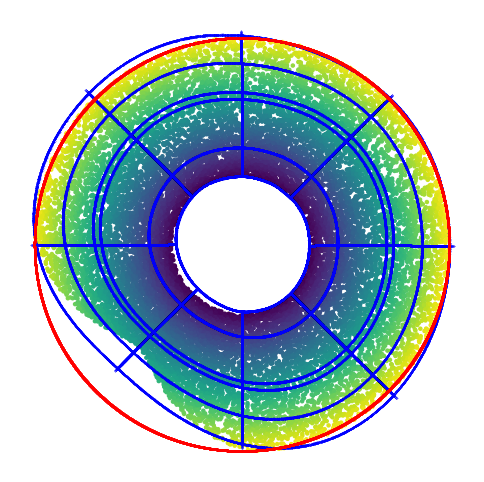

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(b_hat[:, 0], b_hat[:, 1], c=r_b, s=5)
for contour in r_contours:
    plt.scatter(contour[:, 0], contour[:, 1], c='b', s=0.01)
for contour in theta_contours:
    plt.scatter(contour[:, 0], contour[:, 1], c='b', s=0.01)
plt.axis("off");

plt.scatter(outer_circle[:, 0], outer_circle[:, 1], c='r', s=1)

In [15]:
def init_sinkhorn(z, n_neighbors):
    neigh = NearestNeighbors(n_neighbors=n_neighbors)
    neigh.fit(z.detach().cpu().numpy())
    distances, indices = neigh.kneighbors(z.detach().cpu().numpy(), n_neighbors=n_neighbors)

    return indices[:, 1:]

In [23]:
def sinkhorn_loss(neigh_z_b2a, neigh_z_a2b, z_a, z_b2a, z_a2b, z_b, n_neighborhoods):
    # randomly sample n_neighborhoods points from z_b2a and z_a2b w/non overlapping neighborhoods
    z_b2a_centers = np.zeros(n_neighborhoods, dtype=int)
    inds = np.arange(z_b2a.shape[0])
    for i in range(n_neighborhoods):
        z_b2a_centers[i] = np.random.choice(inds)
        inds = np.setdiff1d(inds, neigh_z_b2a[z_b2a_centers[i]].flatten())
        inds = np.setdiff1d(inds, z_b2a_centers[i])
        last_neighbor = neigh_z_b2a[z_b2a_centers[i]][-1]
        inds = np.setdiff1d(inds, neigh_z_b2a[last_neighbor])

    z_a2b_centers = np.zeros(n_neighborhoods, dtype=int)
    inds = np.arange(z_a2b.shape[0])
    for i in range(n_neighborhoods):
        z_a2b_centers[i] = np.random.choice(inds)
        inds = np.setdiff1d(inds, neigh_z_a2b[z_a2b_centers[i]].flatten())
        inds = np.setdiff1d(inds, z_a2b_centers[i])
        last_neighbor = neigh_z_a2b[z_a2b_centers[i]][-1]
        inds = np.setdiff1d(inds, neigh_z_a2b[last_neighbor])

    # calculate the sinkhorn loss
    loss_a2b = torch.tensor([0.0]).to(device)
    loss_b2a = torch.tensor([0.0]).to(device)

    z_a_std = z_a.std(dim=0)
    z_b_std = z_b.std(dim=0)

    for i in range(n_neighborhoods):
        for j in range(i, n_neighborhoods):
            # get the indices of the neighbors of the centers
            inds_zai = neigh_z_b2a[z_b2a_centers[i]]
            inds_zaj = neigh_z_b2a[z_b2a_centers[j]]
            inds_zbi = neigh_z_a2b[z_a2b_centers[i]]
            inds_zbj = neigh_z_a2b[z_a2b_centers[j]]

            # get the private latents of each neighborhood
            z_a_i = z_a[inds_zai]/z_a_std
            z_a_j = z_a[inds_zaj]/z_a_std
            z_b_i = z_b[inds_zbi]/z_b_std
            z_b_j = z_b[inds_zbj]/z_b_std

            sinkhorn = SamplesLoss("sinkhorn", p=2, blur=0.05, scaling=0.8)

            # calculate the sinkhorn loss
            loss_a2b += sinkhorn(z_a_i, z_a_j)
            loss_b2a += sinkhorn(z_b_i, z_b_j)

    return loss_a2b + loss_b2a

In [24]:
optimizer = torch.optim.Adam(model.parameters(), lr=(1e-3))
scheduler = torch.optim.lr_scheduler.LinearLR(optimizer, 1, 1/50, total_iters=2000)
model.train()

a_train = torch.Tensor(view_a).to(device)
b_train = torch.Tensor(view_b).to(device)

losses = np.zeros(2000)

for i in range(2000):
    z_a, z_b2a, z_a2b, z_b, _, _, a_hat, b_hat = model(a_train, b_train)

    if i == 0:
        # neigh_z_b2a = init_sinkhorn(z_b2a, 250)
        neigh_z_a2b = init_sinkhorn(z_a2b, 250)

    z_a, z_b2a, z_a2b, z_b, _, _, a_hat, b_hat = model(a_train, b_train)
    mse = torch.nn.functional.mse_loss(a_train, a_hat) + torch.nn.functional.mse_loss(b_train, b_hat)
    sinkhorn = sinkhorn_loss(neigh_z_a2b, neigh_z_a2b, z_b, z_a2b, z_a2b, z_b, 3)
    loss = mse + 0.01* sinkhorn/3

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    scheduler.step()

    losses[i] = sinkhorn.item()

    print(i, loss.item(), mse.item(), sinkhorn.item())

0 0.04285743832588196 0.04209329932928085 0.2292422354221344
1 0.20272912085056305 0.20248089730739594 0.07446670532226562
2 0.07073208689689636 0.07027629762887955 0.13673700392246246
3 0.10484456270933151 0.1038469672203064 0.29927852749824524
4 0.08776024729013443 0.08727938681840897 0.1442582905292511
5 0.08503349870443344 0.08432316780090332 0.2130986452102661
6 0.0815131813287735 0.08099237829446793 0.15624159574508667
7 0.06115603819489479 0.06056363135576248 0.1777215600013733
8 0.051249708980321884 0.0502251535654068 0.3073667585849762
9 0.06336116045713425 0.06312842667102814 0.06981959193944931
10 0.07354670017957687 0.07312995940446854 0.12502174079418182
11 0.06599663943052292 0.06577114760875702 0.06764722615480423
12 0.053305912762880325 0.052849553525447845 0.1369078904390335
13 0.047644127160310745 0.04739818722009659 0.07378214597702026
14 0.050568580627441406 0.049749117344617844 0.24583947658538818
15 0.05374547466635704 0.052897859364748 0.2542847990989685
16 0.054

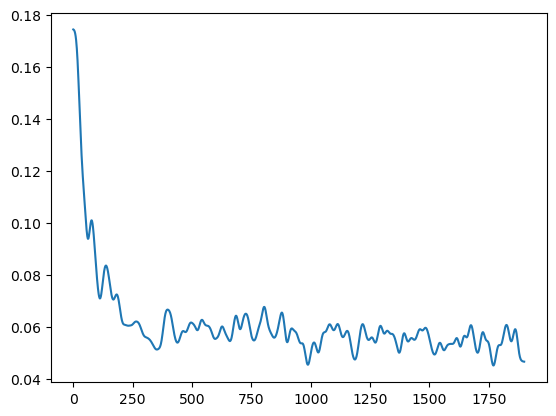

In [25]:
from scipy.ndimage import gaussian_filter1d
plt.plot(gaussian_filter1d(losses[:1900], sigma=10))

In [26]:
z_a, z_b2a, z_a2b, z_b, m_a, m_b, a_hat, b_hat = model(torch.Tensor(view_a).to(device), torch.Tensor(view_b).to(device))

In [27]:
missing_inds = np.argwhere((theta > np.pi) & (theta < 1.5*np.pi)).flatten()
nonmissing_inds = np.argwhere((theta < np.pi) | (theta > 1.5*np.pi)).flatten()

z_b_missing = z_b[missing_inds]
z_b_nonmissing = z_b[nonmissing_inds]

z_b_half1 = z_b[theta < np.pi/2]
z_b_half2 = z_b[(theta > np.pi/2) & (theta < np.pi)]

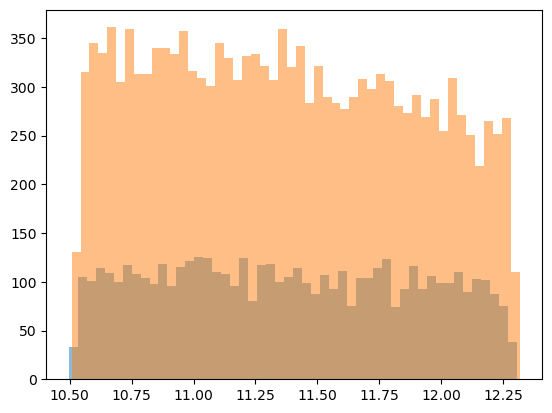

In [29]:
plt.hist(z_b[missing_inds,0].detach().cpu().numpy(), bins=50, alpha=0.5, label="half 1");
plt.hist(z_b[nonmissing_inds,0].detach().cpu().numpy(), bins=50, alpha=0.5, label="half 2");

In [49]:
z_a, z_b2a, z_a2b, z_b, m_a, m_b, a_hat, b_hat = model(torch.Tensor(view_a).to(device), torch.Tensor(view_b).to(device))

z_a = z_a.detach().cpu().numpy()
z_b = z_b.detach().cpu().numpy()
z_a2b = z_a2b.detach().cpu().numpy()
z_b2a = z_b2a.detach().cpu().numpy()
a_hat = a_hat.detach().cpu().numpy()
b_hat = b_hat.detach().cpu().numpy()

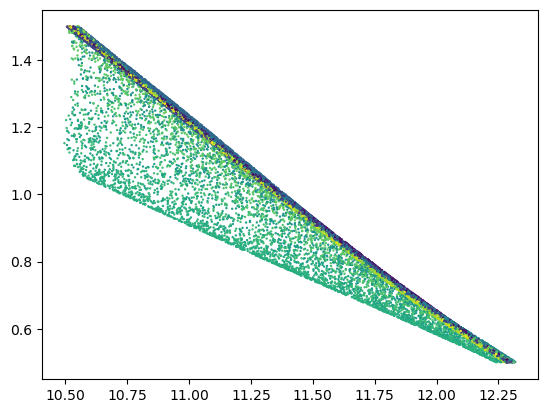

In [50]:
plt.scatter(z_b[:, 0], r_b, c=theta, s=0.5);

In [54]:
radii = np.arange(0.5, 1.7, 0.2)  # From 0.5 to 1.5 inclusive with step 0.2
r_contours = []

for radius in radii:
    # Find the index of the closest r_b to our target radius
    r_ind = np.argsort(np.abs(r_b - radius))[16]
    
    # Get the latent representations
    theta_lat = model.F_a2b(torch.Tensor(view_a).to(device))
    r_lat = model.F_b(torch.Tensor(view_b[r_ind,:]).to(device))
    r_lat = r_lat.repeat(theta_lat.size(0), 1)
    
    # Reconstruct from the latent space
    contour = model.G_b(torch.cat([r_lat, theta_lat], dim=1))
    contour = contour.detach().cpu().numpy()
    
    r_contours.append(contour)

# Now let's create contour lines for different theta values
thetas = np.arange(0, 2*np.pi, np.pi/4)  # From 0 to 2π in increments of π/4
theta_contours = []

for angle in thetas:
    # Find the index of the closest theta to our target angle
    theta_ind = np.argsort(np.abs(theta - angle))[16]
    
    # Get the latent representations
    r_lat = model.F_b(torch.Tensor(view_b).to(device))
    theta_lat = model.F_a2b(torch.Tensor(view_a[theta_ind,:]).to(device))
    theta_lat = theta_lat.repeat(r_lat.size(0), 1)
    
    # Reconstruct from the latent space
    contour = model.G_b(torch.cat([r_lat, theta_lat], dim=1))
    contour = contour.detach().cpu().numpy()
    
    theta_contours.append(contour)

In [55]:
outer_circle = np.zeros((6000, 2))
outer_circle[:,0] = 1.5*np.cos(np.linspace(0, 2*np.pi, 6000))
outer_circle[:,1] = 1.5*np.sin(np.linspace(0, 2*np.pi, 6000))

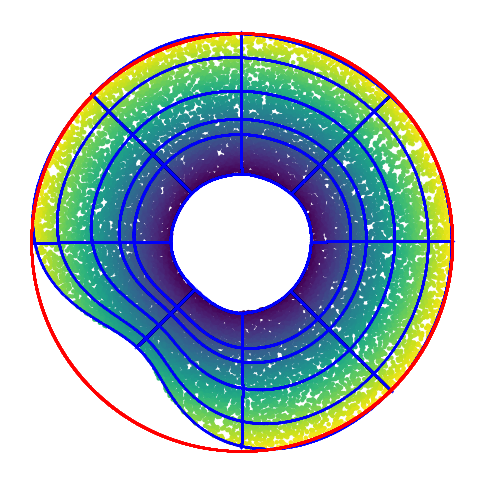

In [56]:
plt.figure(figsize=(6,6))
plt.scatter(b_hat[:, 0], b_hat[:, 1], c=r_b, s=5)
for contour in r_contours:
    plt.scatter(contour[:, 0], contour[:, 1], c='b', s=0.01)
for contour in theta_contours:
    plt.scatter(contour[:, 0], contour[:, 1], c='b', s=0.01)
plt.axis("off");

plt.scatter(outer_circle[:, 0], outer_circle[:, 1], c='r', s=1)

In [45]:
torch.save(model.state_dict(), "../results/models/r-theta/r-theta_ring_smooth-hole_sinkhorn.pt")

In [48]:
model.load_state_dict(torch.load("../results/models/r-theta/r-theta_ring_smooth-hole_sinkhorn.pt"))

<All keys matched successfully>

### DCCA ring with no hole

In [ ]:
# generate ground truth latents
n_samples = 20000

view_a = np.zeros((n_samples, 2))
view_b = np.zeros((n_samples, 2))

theta = 2*np.pi*np.random.rand(n_samples)
r_a = np.random.rand(n_samples) + 0.5
r_b = np.random.rand(n_samples) + 0.5

# generate observations
view_a[:,0] = r_a * np.cos(theta)
view_a[:,1] = r_a * np.sin(theta)

view_b[:,0] = r_b * np.cos(theta)
view_b[:,1] = r_b * np.sin(theta)


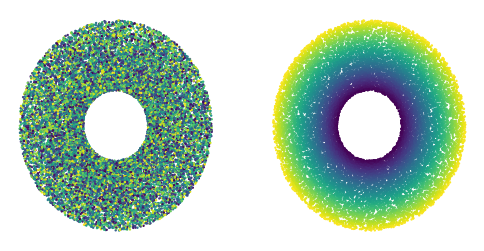

In [3]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.axis("off")
plt.scatter(view_a[:, 0], view_a[:, 1], c=r_b, s=0.5)

plt.subplot(1,2,2)
plt.axis("off")
plt.scatter(view_b[:, 0], view_b[:, 1], c=r_b, s=0.5)

In [ ]:
a_train = torch.Tensor(view_a[:12800]).to(device)
b_train = torch.Tensor(view_b[:12800]).to(device)
a_validation = torch.Tensor(view_a[12800:16000]).to(device)
b_validation = torch.Tensor(view_b[12800:16000]).to(device)


model = SPLICE_DCCA(
    n_a = 2,
    n_b = 2,
    n_shared = 2,
    n_private_a= 1,
    n_private_b= 1,
    enc_layers=[64,64,64],
    dec_layers=[64,64,64],
    msr_layers=[64,64,64],
    device=device,
    act_fn=torch.nn.ReLU,
).to(device)
filepath = "../results/models/r-theta_DCCA.pt"

# model.load_state_dict(torch.load(filepath))

<All keys matched successfully>

In [5]:
model.fit(
    a_train,
    b_train,
    a_validation,
    b_validation,
    epochs=500,
    batch_size=128,
    model_filepath=filepath,
    msr_iter_normal=5,
    msr_iter_restart=100,
    disent_start=50,
    checkpoint_freq=5,
    end_factor=1/50,
    c_disent=10
)

1/500 |                                          |   0% [00:03<28:00,  3.37s/it]

Epoch 0:        A reconstruction: 0.1903 | 0.0233 	 B reconstruction: 0.2073 | 0.0248 	 Disentangling: 0.0000 | 0.0377 	 Measurement: 0.0000 | -0.0377


6/500 |▌                                         |   1% [00:13<17:23,  2.11s/it]

Epoch 5:        A reconstruction: 0.0017 | 0.0017 	 B reconstruction: 0.0027 | 0.0026 	 Disentangling: 0.0000 | 0.0239 	 Measurement: 0.0000 | -0.0239


11/500 |▉                                        |   2% [00:23<16:01,  1.97s/it]

Epoch 10:        A reconstruction: 0.0011 | 0.0010 	 B reconstruction: 0.0017 | 0.0016 	 Disentangling: 0.0000 | 0.0200 	 Measurement: 0.0000 | -0.0200


16/500 |█▎                                       |   3% [00:32<14:51,  1.84s/it]

Epoch 15:        A reconstruction: 0.0008 | 0.0009 	 B reconstruction: 0.0012 | 0.0012 	 Disentangling: 0.0000 | 0.0157 	 Measurement: 0.0000 | -0.0157


21/500 |█▋                                       |   4% [00:41<14:48,  1.86s/it]

Epoch 20:        A reconstruction: 0.0007 | 0.0014 	 B reconstruction: 0.0013 | 0.0009 	 Disentangling: 0.0000 | 0.0228 	 Measurement: 0.0000 | -0.0228


26/500 |██▏                                      |   5% [00:50<14:36,  1.85s/it]

Epoch 25:        A reconstruction: 0.0006 | 0.0008 	 B reconstruction: 0.0009 | 0.0014 	 Disentangling: 0.0000 | 0.0199 	 Measurement: 0.0000 | -0.0199


31/500 |██▌                                      |   6% [00:59<14:30,  1.86s/it]

Epoch 30:        A reconstruction: 0.0007 | 0.0007 	 B reconstruction: 0.0010 | 0.0015 	 Disentangling: 0.0000 | 0.0261 	 Measurement: 0.0000 | -0.0261


36/500 |██▉                                      |   7% [01:08<14:00,  1.81s/it]

Epoch 35:        A reconstruction: 0.0007 | 0.0007 	 B reconstruction: 0.0007 | 0.0007 	 Disentangling: 0.0000 | 0.0293 	 Measurement: 0.0000 | -0.0293


41/500 |███▎                                     |   8% [01:17<14:13,  1.86s/it]

Epoch 40:        A reconstruction: 0.0005 | 0.0010 	 B reconstruction: 0.0007 | 0.0008 	 Disentangling: 0.0000 | 0.0357 	 Measurement: 0.0000 | -0.0357


46/500 |███▊                                     |   9% [01:27<14:24,  1.90s/it]

Epoch 45:        A reconstruction: 0.0005 | 0.0009 	 B reconstruction: 0.0007 | 0.0008 	 Disentangling: 0.0000 | 0.0331 	 Measurement: 0.0000 | -0.0331


51/500 |███▉                                   |  10% [05:14<8:22:42, 67.18s/it]

Epoch 50:        A reconstruction: 0.0198 | 0.0150 	 B reconstruction: 0.0164 | 0.0072 	 Disentangling: 0.1546 | 0.0125 	 Measurement: -0.9947 | -0.0125


56/500 |████▎                                  |  11% [06:19<2:41:42, 21.85s/it]

Epoch 55:        A reconstruction: 0.0079 | 0.0065 	 B reconstruction: 0.0067 | 0.0015 	 Disentangling: 0.0163 | 0.0092 	 Measurement: -0.4456 | -0.0092
saving new best model


61/500 |████▊                                  |  12% [07:22<1:43:37, 14.16s/it]

Epoch 60:        A reconstruction: 0.0064 | 0.0041 	 B reconstruction: 0.0013 | 0.0007 	 Disentangling: 0.0196 | 0.0069 	 Measurement: -0.2753 | -0.0069
saving new best model


66/500 |█████▏                                 |  13% [08:21<1:27:27, 12.09s/it]

Epoch 65:        A reconstruction: 0.0044 | 0.0030 	 B reconstruction: 0.0015 | 0.0004 	 Disentangling: 0.0182 | 0.0063 	 Measurement: -0.2709 | -0.0063
saving new best model


71/500 |█████▌                                 |  14% [09:20<1:24:41, 11.85s/it]

Epoch 70:        A reconstruction: 0.0055 | 0.0036 	 B reconstruction: 0.0010 | 0.0005 	 Disentangling: 0.0154 | 0.0078 	 Measurement: -0.1376 | -0.0078


76/500 |█████▉                                 |  15% [10:23<1:30:44, 12.84s/it]

Epoch 75:        A reconstruction: 0.0047 | 0.0025 	 B reconstruction: 0.0008 | 0.0003 	 Disentangling: 0.0176 | 0.0048 	 Measurement: -0.2357 | -0.0048
saving new best model


81/500 |██████▎                                |  16% [11:23<1:23:58, 12.03s/it]

Epoch 80:        A reconstruction: 0.0077 | 0.0045 	 B reconstruction: 0.0011 | 0.0003 	 Disentangling: 0.0184 | 0.0066 	 Measurement: -0.3079 | -0.0066


86/500 |██████▋                                |  17% [12:18<1:17:42, 11.26s/it]

Epoch 85:        A reconstruction: 0.0045 | 0.0033 	 B reconstruction: 0.0008 | 0.0003 	 Disentangling: 0.0174 | 0.0112 	 Measurement: -0.1260 | -0.0112


91/500 |███████                                |  18% [13:15<1:15:34, 11.09s/it]

Epoch 90:        A reconstruction: 0.0017 | 0.0006 	 B reconstruction: 0.0002 | 0.0001 	 Disentangling: 0.0129 | 0.0074 	 Measurement: -0.1229 | -0.0074
saving new best model


96/500 |███████▍                               |  19% [14:15<1:19:54, 11.87s/it]

Epoch 95:        A reconstruction: 0.0006 | 0.0002 	 B reconstruction: 0.0004 | 0.0002 	 Disentangling: 0.0092 | 0.0038 	 Measurement: -0.1049 | -0.0038
saving new best model


101/500 |███████▋                              |  20% [15:14<1:18:40, 11.83s/it]

Epoch 100:        A reconstruction: 0.0017 | 0.0003 	 B reconstruction: 0.0004 | 0.0003 	 Disentangling: 0.0107 | 0.0068 	 Measurement: -0.0854 | -0.0068


106/500 |████████                              |  21% [16:08<1:12:14, 11.00s/it]

Epoch 105:        A reconstruction: 0.0006 | 0.0002 	 B reconstruction: 0.0003 | 0.0001 	 Disentangling: 0.0140 | 0.0027 	 Measurement: -0.0984 | -0.0027
saving new best model


111/500 |████████▍                             |  22% [17:05<1:13:44, 11.37s/it]

Epoch 110:        A reconstruction: 0.0008 | 0.0002 	 B reconstruction: 0.0009 | 0.0001 	 Disentangling: 0.0129 | 0.0075 	 Measurement: -0.1273 | -0.0075
saving new best model


116/500 |████████▊                             |  23% [18:00<1:10:09, 10.96s/it]

Epoch 115:        A reconstruction: 0.0002 | 0.0001 	 B reconstruction: 0.0002 | 0.0001 	 Disentangling: 0.0079 | 0.0066 	 Measurement: -0.0443 | -0.0066
saving new best model


121/500 |█████████▏                            |  24% [18:49<1:03:12, 10.01s/it]

Epoch 120:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0080 | 0.0079 	 Measurement: -0.0118 | -0.0079
saving new best model


126/500 |█████████▌                            |  25% [19:42<1:06:19, 10.64s/it]

Epoch 125:        A reconstruction: 0.0002 | 0.0002 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0099 | 0.0091 	 Measurement: -0.0107 | -0.0091


131/500 |█████████▉                            |  26% [20:37<1:07:07, 10.92s/it]

Epoch 130:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0001 | 0.0000 	 Disentangling: 0.0077 | 0.0067 	 Measurement: -0.0146 | -0.0067
saving new best model


136/500 |██████████▎                           |  27% [21:42<1:21:01, 13.35s/it]

Epoch 135:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0082 | 0.0073 	 Measurement: -0.0083 | -0.0073
saving new best model


141/500 |██████████▋                           |  28% [22:42<1:14:33, 12.46s/it]

Epoch 140:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0089 | 0.0080 	 Measurement: -0.0150 | -0.0080


146/500 |███████████                           |  29% [23:44<1:12:42, 12.32s/it]

Epoch 145:        A reconstruction: 0.0002 | 0.0001 	 B reconstruction: 0.0001 | 0.0000 	 Disentangling: 0.0079 | 0.0114 	 Measurement: -0.0111 | -0.0114
saving new best model


151/500 |███████████▍                          |  30% [24:55<1:19:14, 13.62s/it]

Epoch 150:        A reconstruction: 0.0002 | 0.0001 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0087 | 0.0100 	 Measurement: -0.0142 | -0.0100


156/500 |███████████▊                          |  31% [26:04<1:19:24, 13.85s/it]

Epoch 155:        A reconstruction: 0.0002 | 0.0001 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0088 | 0.0061 	 Measurement: -0.0314 | -0.0061


161/500 |████████████▏                         |  32% [27:06<1:13:20, 12.98s/it]

Epoch 160:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: nan | nan 	 Measurement: nan | nan


162/500 |████████████▉                           |  32% [27:25<57:13, 10.16s/it]


KeyboardInterrupt: 

In [10]:
model = SPLICE_DCCA(
    n_a = 2,
    n_b = 2,
    n_shared = 2,
    n_private_a= 1,
    n_private_b= 1,
    enc_layers=[64,64,64],
    dec_layers=[64,64,64],
    msr_layers=[64,64,64],
    device=device,
    act_fn=torch.nn.ReLU,
).to(device)
filepath = "../results/models/r-theta_DCCA.pt"

model.load_state_dict(torch.load(filepath))

<All keys matched successfully>

In [11]:
z_a, z_b2a, z_a2b, z_b, m_z_a, m_x_b, m_z_b, m_x_a, a_hat, b_hat = model(torch.Tensor(view_a).to(device), torch.Tensor(view_b).to(device))

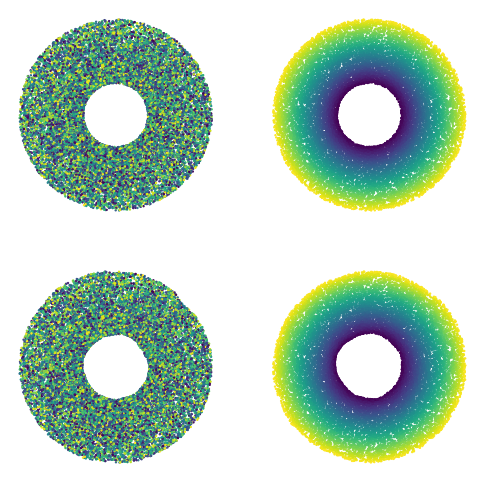

In [12]:
plt.figure(figsize=(6,6))
plt.subplot(2,2,1)
plt.axis("off")
plt.scatter(view_a[:, 0], view_a[:, 1], c=r_b, s=0.5)

plt.subplot(2,2,2)
plt.axis("off")
plt.scatter(view_b[:, 0], view_b[:, 1], c=r_b, s=0.5)


a_hat = a_hat.detach().cpu().numpy()
b_hat = b_hat.detach().cpu().numpy()

plt.subplot(2,2,3)
plt.axis("off")
plt.scatter(a_hat[:, 0], a_hat[:, 1], c=r_b, s=0.5)

plt.subplot(2,2,4)
plt.axis("off")
plt.scatter(b_hat[:, 0], b_hat[:, 1], c=r_b, s=0.5)

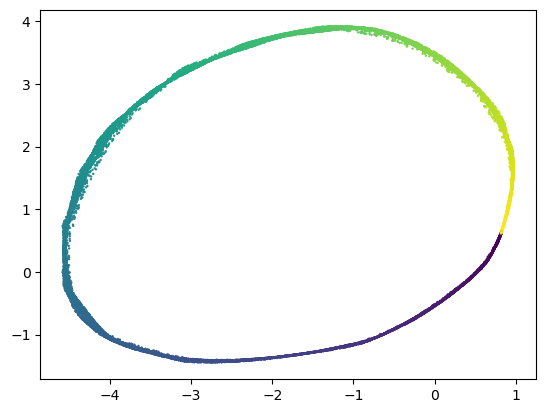

In [19]:
plt.scatter(z_b2a[:,0].detach().cpu().numpy(), z_b2a[:,1].detach().cpu().numpy(), c=theta, s=0.5)

In [34]:
radii = np.arange(0.5, 1.7, 0.2)  # From 0.5 to 1.5 inclusive with step 0.2
r_contours = []

for radius in radii:
    # Find the index of the closest r_b to our target radius
    r_ind = np.argsort(np.abs(r_b - radius))[0]
    
    # Get the latent representations
    theta_lat = model.F_a2b(torch.Tensor(view_a).to(device))
    r_lat = model.F_b(torch.Tensor(view_b[r_ind,:]).to(device))
    r_lat = r_lat.repeat(theta_lat.size(0), 1)
    
    # Reconstruct from the latent space
    contour = model.G_b(torch.cat([r_lat, theta_lat], dim=1))
    contour = contour.detach().cpu().numpy()
    
    r_contours.append(contour)

# # Now let's create contour lines for different theta values
thetas = np.arange(0, 2*np.pi, np.pi/4)  # From 0 to 2π in increments of π/4
theta_contours = []

for angle in thetas:
    # Find the index of the closest theta to our target angle
    theta_ind = np.argsort(np.abs(theta - angle))[0]
    
    # Get the latent representations
    r_lat = model.F_b(torch.Tensor(view_b).to(device))
    theta_lat = model.F_a2b(torch.Tensor(view_a[theta_ind,:]).to(device))
    theta_lat = theta_lat.repeat(r_lat.size(0), 1)
    
    # Reconstruct from the latent space
    contour = model.G_b(torch.cat([r_lat, theta_lat], dim=1))
    contour = contour.detach().cpu().numpy()
    
    theta_contours.append(contour)

(-1.7443618178367615,
 1.7163652777671814,
 -1.6643959045410157,
 1.7021804809570313)

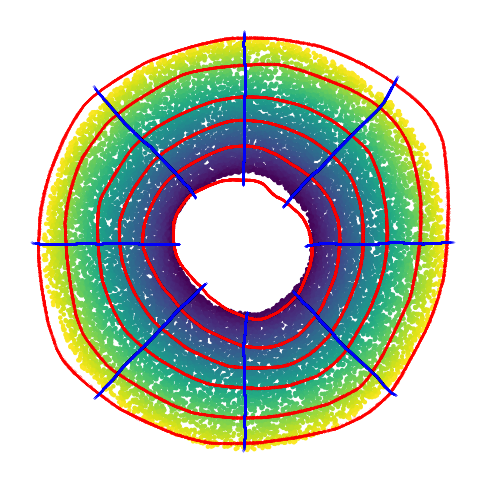

In [35]:
plt.figure(figsize=(6,6))
plt.scatter(b_hat[:, 0], b_hat[:, 1], c=r_b, s=5)
for contour in r_contours:
    plt.scatter(contour[:, 0], contour[:, 1], c='r', s=0.01)
for contour in theta_contours:
    plt.scatter(contour[:, 0], contour[:, 1], c='b', s=0.01)
plt.axis("off")

### Ring with hole in middle

In [2]:
# generate ground truth latents
n_samples = 20000

view_a = np.zeros((n_samples, 2))
view_b = np.zeros((n_samples, 2))

theta = 2*np.pi*np.random.rand(n_samples)
r_a = np.random.rand(n_samples) + 0.5
r_b = np.random.rand(n_samples) + 0.5

# limit the radii of one quadrant to be between 0.5 and 1.2 
missing_inds = np.argwhere((theta > np.pi) & (theta < 1.5*np.pi)).flatten()
n_missing = missing_inds.shape[0]
new_radius = np.random.rand(n_missing) * 0.7
new_radius[new_radius > 0.4] = new_radius[new_radius > 0.4] + 0.3
r_b[missing_inds] = new_radius + 0.5

# generate observations
view_a[:,0] = r_a * np.cos(theta)
view_a[:,1] = r_a * np.sin(theta)

view_b[:,0] = r_b * np.cos(theta)
view_b[:,1] = r_b * np.sin(theta)


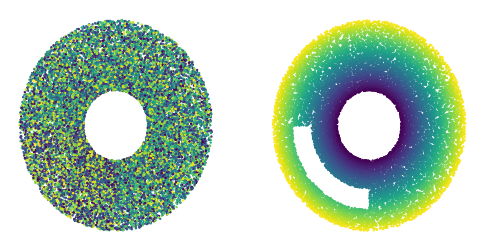

In [3]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.axis("off")
plt.scatter(view_a[:, 0], view_a[:, 1], c=r_b, s=0.5)

plt.subplot(1,2,2)
plt.axis("off")
plt.scatter(view_b[:, 0], view_b[:, 1], c=r_b, s=0.5)

In [104]:
a_train = torch.Tensor(view_a[:16000]).to(device)
b_train = torch.Tensor(view_b[:16000]).to(device)
a_validation = torch.Tensor(view_a[12800:16000]).to(device)
b_validation = torch.Tensor(view_b[12800:16000]).to(device)


model = SPLICE(
    n_a = 2,
    n_b = 2,
    n_shared = 2,
    n_private_a= 1,
    n_private_b= 1,
    enc_layers=[64,64,64, 64, 64],
    dec_layers=[64,64,64, 64, 64],
    msr_layers=[64,64,64, 64, 64],
    device=device,
    act_fn=torch.nn.SiLU
).to(device)
filepath = "../results/models/r-theta_ring_middle-hole.pt"

In [105]:
model.fit(
    a_train,
    b_train,
    a_validation,
    b_validation,
    epochs=500,
    batch_size=128,
    lr=1e-3,
    model_filepath=filepath,
    disent_start=50,
    checkpoint_freq=5,
    msr_restart=1000,
    msr_iter_restart=100,
    msr_iter_normal=5,
    weight_decay=1e-3,
    c_disent=1,
    end_factor=1/50
)

1/500 |                                          |   0% [00:06<52:18,  6.29s/it]

Epoch 0:        A reconstruction: 0.2992 | 0.0333 	 B reconstruction: 0.2350 | 0.0314 	 Disentangling: 0.0000 | 0.0000 	 Measurement: 0.0000 | 2.0173


6/500 |▌                                         |   1% [00:20<25:08,  3.05s/it]

Epoch 5:        A reconstruction: 0.0124 | 0.0100 	 B reconstruction: 0.0098 | 0.0085 	 Disentangling: 0.0000 | 0.0001 	 Measurement: 0.0000 | 2.0187


11/500 |▉                                        |   2% [00:35<23:46,  2.92s/it]

Epoch 10:        A reconstruction: 0.0045 | 0.0041 	 B reconstruction: 0.0041 | 0.0040 	 Disentangling: 0.0000 | 0.0002 	 Measurement: 0.0000 | 2.0203


16/500 |█▎                                       |   3% [00:49<23:21,  2.90s/it]

Epoch 15:        A reconstruction: 0.0020 | 0.0031 	 B reconstruction: 0.0022 | 0.0019 	 Disentangling: 0.0000 | 0.0005 	 Measurement: 0.0000 | 2.0228


21/500 |█▋                                       |   4% [01:03<21:49,  2.73s/it]

Epoch 20:        A reconstruction: 0.0017 | 0.0018 	 B reconstruction: 0.0010 | 0.0013 	 Disentangling: 0.0000 | 0.0006 	 Measurement: 0.0000 | 2.0194


26/500 |██▏                                      |   5% [01:17<22:39,  2.87s/it]

Epoch 25:        A reconstruction: 0.0007 | 0.0006 	 B reconstruction: 0.0017 | 0.0020 	 Disentangling: 0.0000 | 0.0005 	 Measurement: 0.0000 | 2.0236


31/500 |██▌                                      |   6% [01:30<20:55,  2.68s/it]

Epoch 30:        A reconstruction: 0.0007 | 0.0014 	 B reconstruction: 0.0007 | 0.0007 	 Disentangling: 0.0000 | 0.0004 	 Measurement: 0.0000 | 2.0245


36/500 |██▉                                      |   7% [01:45<22:18,  2.88s/it]

Epoch 35:        A reconstruction: 0.0005 | 0.0008 	 B reconstruction: 0.0007 | 0.0006 	 Disentangling: 0.0000 | 0.0003 	 Measurement: 0.0000 | 2.0260


41/500 |███▎                                     |   8% [01:59<22:14,  2.91s/it]

Epoch 40:        A reconstruction: 0.0007 | 0.0007 	 B reconstruction: 0.0005 | 0.0006 	 Disentangling: 0.0000 | 0.0003 	 Measurement: 0.0000 | 2.0274


46/500 |███▊                                     |   9% [02:15<23:59,  3.17s/it]

Epoch 45:        A reconstruction: 0.0006 | 0.0008 	 B reconstruction: 0.0005 | 0.0003 	 Disentangling: 0.0000 | 0.0002 	 Measurement: 0.0000 | 2.0235


51/500 |███▉                                   |  10% [04:39<5:13:08, 41.84s/it]

Epoch 50:        A reconstruction: 0.0243 | 0.0077 	 B reconstruction: 0.0167 | 0.0073 	 Disentangling: 0.0951 | 0.0515 	 Measurement: 1.1650 | 2.2651
saving new best model


56/500 |████▎                                  |  11% [05:27<1:50:01, 14.87s/it]

Epoch 55:        A reconstruction: 0.0430 | 0.0324 	 B reconstruction: 0.0068 | 0.0052 	 Disentangling: 0.0144 | 0.0065 	 Measurement: 1.8658 | 16.8258


61/500 |████▊                                  |  12% [06:12<1:14:11, 10.14s/it]

Epoch 60:        A reconstruction: 0.0276 | 0.0191 	 B reconstruction: 0.0090 | 0.0043 	 Disentangling: 0.0154 | 0.0125 	 Measurement: 1.9408 | 2.5146


66/500 |█████▏                                 |  13% [06:57<1:05:32,  9.06s/it]

Epoch 65:        A reconstruction: 0.0419 | 0.0407 	 B reconstruction: 0.0029 | 0.0029 	 Disentangling: 0.0169 | 0.0143 	 Measurement: 1.9781 | 2.0065


71/500 |█████▌                                 |  14% [07:44<1:07:06,  9.39s/it]

Epoch 70:        A reconstruction: 0.0411 | 0.0397 	 B reconstruction: 0.0033 | 0.0031 	 Disentangling: 0.0144 | 0.0128 	 Measurement: 1.9820 | 2.0042


76/500 |█████▉                                 |  15% [08:31<1:06:32,  9.42s/it]

Epoch 75:        A reconstruction: 0.0397 | 0.0380 	 B reconstruction: 0.0035 | 0.0030 	 Disentangling: 0.0141 | 0.0106 	 Measurement: 1.9516 | 3.8171


81/500 |██████▎                                |  16% [09:15<1:02:26,  8.94s/it]

Epoch 80:        A reconstruction: 0.0048 | 0.0023 	 B reconstruction: 0.0029 | 0.0027 	 Disentangling: 0.0099 | 0.0083 	 Measurement: 1.9778 | 1.9856
saving new best model


86/500 |██████▋                                |  17% [10:02<1:04:13,  9.31s/it]

Epoch 85:        A reconstruction: 0.0013 | 0.0006 	 B reconstruction: 0.0019 | 0.0017 	 Disentangling: 0.0041 | 0.0032 	 Measurement: 1.9789 | 1.9902
saving new best model


91/500 |███████                                |  18% [10:48<1:01:29,  9.02s/it]

Epoch 90:        A reconstruction: 0.0004 | 0.0002 	 B reconstruction: 0.0008 | 0.0002 	 Disentangling: 0.0007 | 0.0001 	 Measurement: 1.9919 | 2.0012
saving new best model


96/500 |███████▍                               |  19% [11:35<1:02:57,  9.35s/it]

Epoch 95:        A reconstruction: 0.0004 | 0.0001 	 B reconstruction: 0.0016 | 0.0001 	 Disentangling: 0.0004 | 0.0001 	 Measurement: 1.9878 | 2.0028
saving new best model


101/500 |███████▋                              |  20% [12:21<1:01:32,  9.26s/it]

Epoch 100:        A reconstruction: 0.0002 | 0.0001 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0001 | 0.0000 	 Measurement: 2.0031 | 1.9999
saving new best model


106/500 |████████                              |  21% [13:09<1:02:15,  9.48s/it]

Epoch 105:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0001 | 0.0000 	 Disentangling: 0.0001 | 0.0001 	 Measurement: 1.9992 | 2.0006
saving new best model


106/500 |████████▍                               |  21% [13:15<49:17,  7.51s/it]


KeyboardInterrupt: 

In [106]:
model = SPLICE(
    n_a = 2,
    n_b = 2,
    n_shared = 2,
    n_private_a= 1,
    n_private_b= 1,
    enc_layers=[64,64,64,64,64],
    dec_layers=[64,64,64,64,64],
    msr_layers=[64,64,64,64,64],
    device=device,
    act_fn = torch.nn.SiLU
).to(device)
filepath = "../results/models/r-theta_ring_middle-hole.pt"
model.load_state_dict(torch.load(filepath))


<All keys matched successfully>

In [116]:
z_a, z_b2a, z_a2b, z_b, m_a, m_b, a_hat, b_hat = model(torch.Tensor(view_a).to(device), torch.Tensor(view_b).to(device))

In [117]:
def init_sinkhorn(z, n_neighbors):
    neigh = NearestNeighbors(n_neighbors=n_neighbors)
    neigh.fit(z.detach().cpu().numpy())
    distances, indices = neigh.kneighbors(z.detach().cpu().numpy(), n_neighbors=n_neighbors)

    return indices[:, 1:]

In [132]:
neigh_z_b2a.shape

(20000, 499)

In [118]:
def sinkhorn_loss(neigh_z_b2a, neigh_z_a2b, z_a, z_b2a, z_a2b, z_b, n_neighborhoods):
    # randomly sample n_neighborhoods points from z_b2a and z_a2b    
    z_b2a_centers = np.random.choice(z_b2a.shape[0], n_neighborhoods)
    z_a2b_centers = np.random.choice(z_a2b.shape[0], n_neighborhoods)
    z_a_std = z_a.std(dim=0)
    z_b_std = z_b.std(dim=0)

    # calculate the sinkhorn loss
    loss_a2b = torch.tensor([0.0]).to(device)
    loss_b2a = torch.tensor([0.0]).to(device)

    for i in range(n_neighborhoods):
        for j in range(i, n_neighborhoods):
            # get the indices of the neighbors of the centers
            inds_zai = neigh_z_b2a[z_b2a_centers[i]]
            inds_zaj = neigh_z_b2a[z_b2a_centers[j]]
            inds_zbi = neigh_z_a2b[z_a2b_centers[i]]
            inds_zbj = neigh_z_a2b[z_a2b_centers[j]]

            # get the private latents of each neighborhood
            z_a_i = z_a[inds_zai]/z_a_std
            z_a_j = z_a[inds_zaj]/z_a_std
            z_b_i = z_b[inds_zbi]/z_b_std
            z_b_j = z_b[inds_zbj]/z_b_std

            sinkhorn = SamplesLoss("sinkhorn", p=2, blur=0.05, scaling=0.8)

            # calculate the sinkhorn loss
            loss_a2b += sinkhorn(z_a_i, z_a_j)
            loss_b2a += sinkhorn(z_b_i, z_b_j)

    return loss_a2b + loss_b2a

In [119]:
optimizer = torch.optim.Adam(model.parameters(), lr=(1e-3))
model.train()

a_train = torch.Tensor(view_a).to(device)
b_train = torch.Tensor(view_b).to(device)

losses = np.zeros(2000)

for i in range(2000):
    z_a, z_b2a, z_a2b, z_b, _, _, a_hat, b_hat = model(a_train, b_train)

    if i == 0:
        neigh_z_b2a = init_sinkhorn(z_b2a, 500)
        neigh_z_a2b = init_sinkhorn(z_a2b, 500)

    z_a_std = z_a.std(dim=0)
    z_b_std = z_b.std(dim=0)

    z_a, z_b2a, z_a2b, z_b, _, _, a_hat, b_hat = model(a_train, b_train)
    mse = torch.nn.functional.mse_loss(a_train, a_hat) + torch.nn.functional.mse_loss(b_train, b_hat)
    sinkhorn = sinkhorn_loss(neigh_z_b2a, neigh_z_a2b, z_a, z_b2a, z_a2b, z_b, 5)
    loss = mse + sinkhorn

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses[i] = sinkhorn.item()

    print(i, loss.item(), mse.item(), sinkhorn.item())

0 0.5103886723518372 0.0001341032620985061 0.5102545619010925
1 0.8593994975090027 0.21657706797122955 0.6428224444389343
2 0.46478959918022156 0.058066777884960175 0.4067228138446808
3 0.4355470836162567 0.08181482553482056 0.35373225808143616
4 0.24696695804595947 0.07470176368951797 0.1722652018070221
5 0.1654862016439438 0.09485591948032379 0.07063028216362
6 0.5684929490089417 0.09005659818649292 0.47843635082244873
7 0.19187846779823303 0.045654185116291046 0.14622429013252258
8 0.16329696774482727 0.01842287741601467 0.14487409591674805
9 0.18720534443855286 0.034468572586774826 0.15273676812648773
10 0.41735202074050903 0.05313841998577118 0.36421358585357666
11 0.3151991665363312 0.047588251531124115 0.26761090755462646
12 0.47061342000961304 0.03667030483484268 0.43394312262535095
13 0.3409431278705597 0.03256816416978836 0.30837497115135193
14 0.4727330207824707 0.029054470360279083 0.4436785578727722
15 0.36275672912597656 0.022603433579206467 0.340153306722641
16 0.2214683

KeyboardInterrupt: 

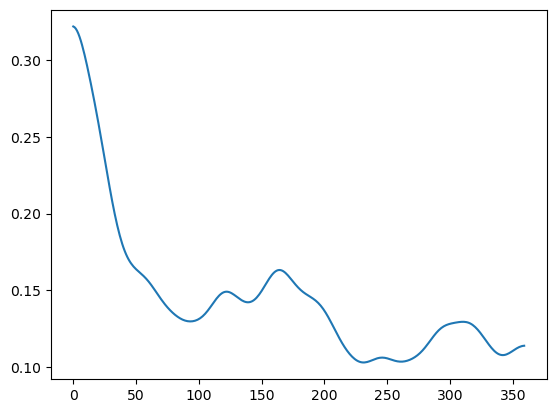

In [121]:
from scipy.ndimage import gaussian_filter1d
plt.plot(gaussian_filter1d(losses[:360], sigma=10))

In [165]:
from torch import index_add


z_a2b_centers = np.random.choice(z_a2b.shape[0], 5)
inds_zai = neigh_z_b2a[z_a2b_centers]
inds = np.zeros(z_a2b.shape[0])

for i in range(5):
    inds[inds_zai[i]] = i + 1


In [166]:
inds_zai.shape

(5, 499)

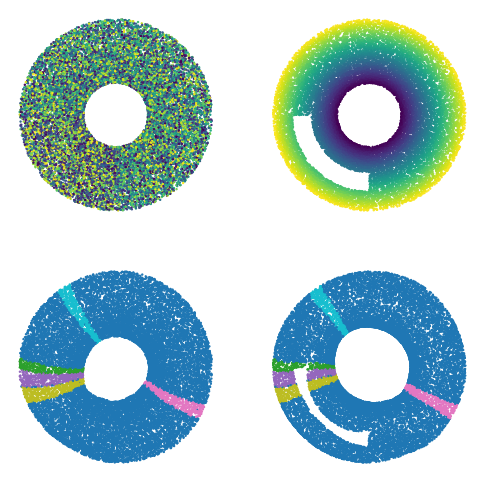

In [167]:
plt.figure(figsize=(6,6))
plt.subplot(2,2,1)
plt.axis("off")
plt.scatter(view_a[:, 0], view_a[:, 1], c=r_b, s=0.5)

plt.subplot(2,2,2)
plt.axis("off")
plt.scatter(view_b[:, 0], view_b[:, 1], c=r_b, s=0.5)


# a_hat = a_hat.detach().cpu().numpy()
# b_hat = b_hat.detach().cpu().numpy()

plt.subplot(2,2,3)
plt.axis("off")
plt.scatter(a_hat[:, 0], a_hat[:, 1], c=inds, cmap='tab10', s=0.5)

plt.subplot(2,2,4)
plt.axis("off")
plt.scatter(b_hat[:, 0], b_hat[:, 1], c=inds, cmap='tab10', s=0.5)

In [154]:
radii = np.arange(0.5, 1.7, 0.05)  # From 0.5 to 1.5 inclusive with step 0.2
r_contours = []

for radius in radii:
    # Find the index of the closest r_b to our target radius
    r_ind = np.argsort(np.abs(r_b - radius))[1]
    
    # Get the latent representations
    theta_lat = model.F_a2b(torch.Tensor(view_a).to(device))
    r_lat = model.F_b(torch.Tensor(view_b[r_ind,:]).to(device))
    r_lat = r_lat.repeat(theta_lat.size(0), 1)
    
    # Reconstruct from the latent space
    contour = model.G_b(torch.cat([r_lat, theta_lat], dim=1))
    contour = contour.detach().cpu().numpy()
    
    r_contours.append(contour)

# Now let's create contour lines for different theta values
thetas = np.arange(0, 2*np.pi, np.pi/4)  # From 0 to 2π in increments of π/4
theta_contours = []

for angle in thetas:
    # Find the index of the closest theta to our target angle
    theta_ind = np.argsort(np.abs(theta - angle))[1]
    
    # Get the latent representations
    r_lat = model.F_b(torch.Tensor(view_b).to(device))
    theta_lat = model.F_a2b(torch.Tensor(view_a[theta_ind,:]).to(device))
    theta_lat = theta_lat.repeat(r_lat.size(0), 1)
    
    # Reconstruct from the latent space
    contour = model.G_b(torch.cat([r_lat, theta_lat], dim=1))
    contour = contour.detach().cpu().numpy()
    
    theta_contours.append(contour)

(np.float64(-1.6226836919784546),
 np.float64(1.6063596487045289),
 np.float64(-1.5936477839946748),
 np.float64(1.594076818227768))

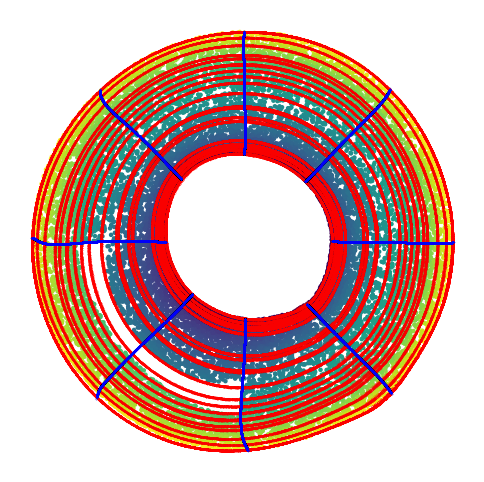

In [155]:
plt.figure(figsize=(6,6))
plt.scatter(b_hat[:, 0], b_hat[:, 1], c=r_b, s=5)
for contour in r_contours:
    plt.scatter(contour[:, 0], contour[:, 1], c='r', s=0.01)
for contour in theta_contours:
    plt.scatter(contour[:, 0], contour[:, 1], c='b', s=0.01)
plt.axis("off")

In [125]:
missing_inds = np.argwhere((theta > np.pi) & (theta < 1.5*np.pi)).flatten()
nonmissing_inds = np.argwhere((theta < np.pi) | (theta > 1.5*np.pi)).flatten()

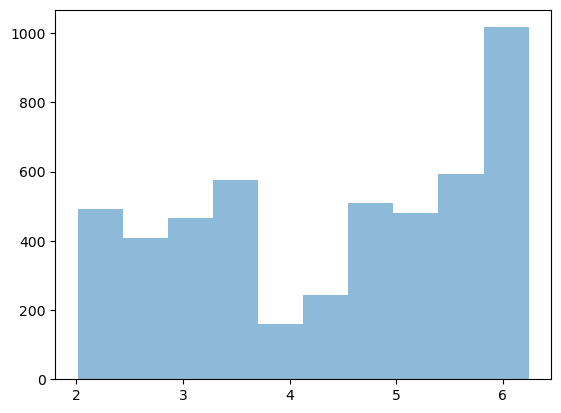

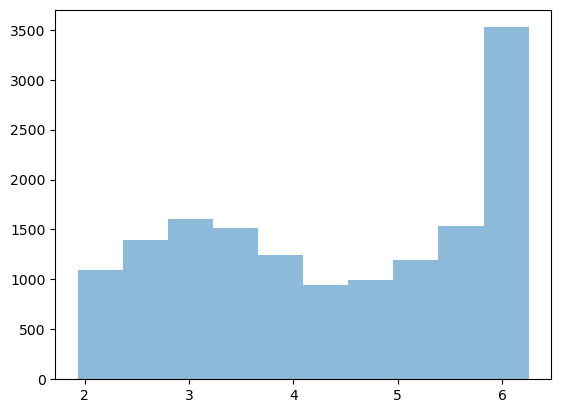

In [126]:
plt.hist(z_b[missing_inds,0].detach().cpu().numpy(), alpha=0.5, label="half 1");

plt.figure()
plt.hist(z_b[nonmissing_inds,0].detach().cpu().numpy(), alpha=0.5, label="half 2");

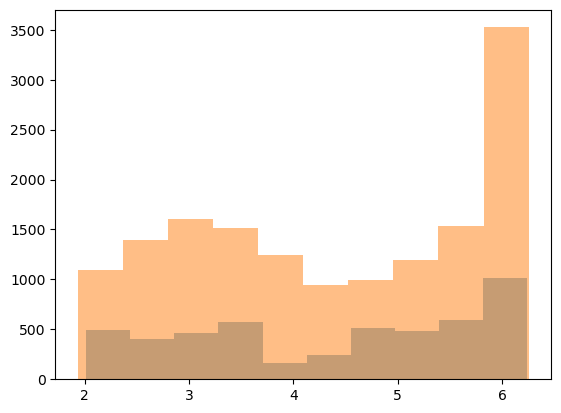

In [127]:
plt.hist(z_b[missing_inds,0].detach().cpu().numpy(), alpha=0.5, label="half 1");
plt.hist(z_b[nonmissing_inds,0].detach().cpu().numpy(), alpha=0.5, label="half 2");

### DCCA ring with edge hole

In [2]:
# generate ground truth latents
n_samples = 20000

view_a = np.zeros((n_samples, 2))
view_b = np.zeros((n_samples, 2))

theta = 2*np.pi*np.random.rand(n_samples)
r_a = np.random.rand(n_samples) + 0.5
r_b = np.random.rand(n_samples) + 0.5

# limit the radii of one quadrant to be between 0.5 and 1.2 
missing_inds = np.argwhere((theta > np.pi) & (theta < 1.5*np.pi)).flatten()
n_missing = missing_inds.shape[0]
new_radius = np.random.rand(n_missing) * 0.7
r_b[missing_inds] = new_radius + 0.5

# generate observations
view_a[:,0] = r_a * np.cos(theta)
view_a[:,1] = r_a * np.sin(theta)

view_b[:,0] = r_b * np.cos(theta)
view_b[:,1] = r_b * np.sin(theta)


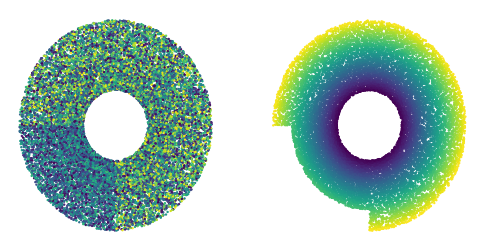

In [3]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.axis("off")
plt.scatter(view_a[:, 0], view_a[:, 1], c=r_b, s=0.5)

plt.subplot(1,2,2)
plt.axis("off")
plt.scatter(view_b[:, 0], view_b[:, 1], c=r_b, s=0.5)

In [59]:
a_train = torch.Tensor(view_a[:12800]).to(device)
b_train = torch.Tensor(view_b[:12800]).to(device)
a_validation = torch.Tensor(view_a[12800:16000]).to(device)
b_validation = torch.Tensor(view_b[12800:16000]).to(device)


model = SPLICE_DCCA(
    n_a = 2,
    n_b = 2,
    n_shared = 2,
    n_private_a= 1,
    n_private_b= 1,
    enc_layers=[64,64,64,64,64],
    dec_layers=[64,64,64,64,64],
    msr_layers=[64,64,64,64,64],
    device=device,
    act_fn=torch.nn.ReLU,
).to(device)
filepath = "../results/models/r-theta_edge-hole_DCCA.pt"

In [62]:
model.fit(
    a_train,
    b_train,
    a_validation,
    b_validation,
    epochs=500,
    batch_size=1000,
    model_filepath=filepath,
    msr_restart=50,
    msr_iter_normal=10,
    msr_iter_restart=300,
    disent_start=-1,
    checkpoint_freq=5,
    end_factor=1/50,
    c_disent=5
)

1/500 |                                       |   0% [01:20<11:12:40, 80.88s/it]

Epoch 0:        A reconstruction: 0.0441 | 0.0058 	 B reconstruction: 0.0615 | 0.0272 	 Disentangling: 0.0130 | 0.0030 	 Measurement: -0.0150 | -0.0030
saving new best model


6/500 |▍                                       |   1% [01:43<1:13:32,  8.93s/it]

Epoch 5:        A reconstruction: 0.0008 | 0.0007 	 B reconstruction: 0.0020 | 0.0012 	 Disentangling: 0.0029 | 0.0009 	 Measurement: -0.0112 | -0.0009
saving new best model


11/500 |▉                                        |   2% [02:06<42:02,  5.16s/it]

Epoch 10:        A reconstruction: 0.0009 | 0.0006 	 B reconstruction: 0.0015 | 0.0009 	 Disentangling: 0.0054 | 0.0006 	 Measurement: -0.0115 | -0.0006
saving new best model


16/500 |█▎                                       |   3% [02:27<36:21,  4.51s/it]

Epoch 15:        A reconstruction: 0.0005 | 0.0005 	 B reconstruction: 0.0012 | 0.0007 	 Disentangling: 0.0028 | 0.0024 	 Measurement: -0.0076 | -0.0024
saving new best model


21/500 |█▋                                       |   4% [02:50<36:30,  4.57s/it]

Epoch 20:        A reconstruction: 0.0002 | 0.0002 	 B reconstruction: 0.0013 | 0.0013 	 Disentangling: 0.0054 | 0.0010 	 Measurement: -0.0215 | -0.0010


26/500 |██▏                                      |   5% [03:12<34:12,  4.33s/it]

Epoch 25:        A reconstruction: 0.0003 | 0.0002 	 B reconstruction: 0.0010 | 0.0007 	 Disentangling: 0.0016 | 0.0014 	 Measurement: -0.0059 | -0.0014
saving new best model


31/500 |██▌                                      |   6% [03:34<34:33,  4.42s/it]

Epoch 30:        A reconstruction: 0.0008 | 0.0009 	 B reconstruction: 0.0003 | 0.0004 	 Disentangling: 0.0010 | 0.0019 	 Measurement: -0.0029 | -0.0019


36/500 |██▉                                      |   7% [03:57<34:14,  4.43s/it]

Epoch 35:        A reconstruction: 0.0004 | 0.0003 	 B reconstruction: 0.0011 | 0.0017 	 Disentangling: 0.0034 | 0.0038 	 Measurement: -0.0107 | -0.0038


41/500 |███▎                                     |   8% [04:19<33:57,  4.44s/it]

Epoch 40:        A reconstruction: 0.0005 | 0.0002 	 B reconstruction: 0.0006 | 0.0004 	 Disentangling: 0.0039 | 0.0046 	 Measurement: -0.0065 | -0.0046
saving new best model


46/500 |███▊                                     |   9% [04:41<33:16,  4.40s/it]

Epoch 45:        A reconstruction: 0.0002 | 0.0002 	 B reconstruction: 0.0006 | 0.0005 	 Disentangling: 0.0019 | 0.0009 	 Measurement: -0.0053 | -0.0009
saving new best model


51/500 |████▏                                    |  10% [05:04<34:54,  4.66s/it]

Epoch 50:        A reconstruction: 0.0002 | 0.0002 	 B reconstruction: 0.0005 | 0.0006 	 Disentangling: 0.0028 | 0.0039 	 Measurement: -0.0096 | -0.0039


56/500 |████▌                                    |  11% [05:27<33:32,  4.53s/it]

Epoch 55:        A reconstruction: 0.0003 | 0.0002 	 B reconstruction: 0.0010 | 0.0007 	 Disentangling: 0.0044 | 0.0007 	 Measurement: -0.0058 | -0.0007


61/500 |█████                                    |  12% [05:49<33:40,  4.60s/it]

Epoch 60:        A reconstruction: 0.0002 | 0.0001 	 B reconstruction: 0.0006 | 0.0007 	 Disentangling: 0.0026 | 0.0023 	 Measurement: -0.0064 | -0.0023


66/500 |█████▍                                   |  13% [06:12<34:11,  4.73s/it]

Epoch 65:        A reconstruction: 0.0002 | 0.0002 	 B reconstruction: 0.0007 | 0.0012 	 Disentangling: 0.0038 | 0.0034 	 Measurement: -0.0081 | -0.0034


71/500 |█████▊                                   |  14% [06:33<30:46,  4.30s/it]

Epoch 70:        A reconstruction: 0.0002 | 0.0002 	 B reconstruction: 0.0009 | 0.0005 	 Disentangling: 0.0042 | 0.0020 	 Measurement: -0.0057 | -0.0020
saving new best model


76/500 |██████▏                                  |  15% [06:54<30:04,  4.26s/it]

Epoch 75:        A reconstruction: 0.0006 | 0.0003 	 B reconstruction: 0.0008 | 0.0008 	 Disentangling: 0.0055 | 0.0021 	 Measurement: -0.0207 | -0.0021


81/500 |██████▋                                  |  16% [07:15<28:39,  4.10s/it]

Epoch 80:        A reconstruction: 0.0003 | 0.0001 	 B reconstruction: 0.0002 | 0.0002 	 Disentangling: 0.0035 | 0.0011 	 Measurement: -0.0061 | -0.0011
saving new best model


86/500 |███████                                  |  17% [07:36<28:56,  4.19s/it]

Epoch 85:        A reconstruction: 0.0002 | 0.0001 	 B reconstruction: 0.0005 | 0.0007 	 Disentangling: 0.0043 | 0.0027 	 Measurement: -0.0101 | -0.0027


91/500 |███████▍                                 |  18% [07:58<29:19,  4.30s/it]

Epoch 90:        A reconstruction: 0.0003 | 0.0001 	 B reconstruction: 0.0008 | 0.0009 	 Disentangling: 0.0021 | 0.0018 	 Measurement: -0.0075 | -0.0018


96/500 |███████▊                                 |  19% [08:19<29:21,  4.36s/it]

Epoch 95:        A reconstruction: 0.0003 | 0.0003 	 B reconstruction: 0.0002 | 0.0002 	 Disentangling: 0.0016 | 0.0006 	 Measurement: -0.0011 | -0.0006
saving new best model


101/500 |███████▋                              |  20% [09:45<2:37:25, 23.67s/it]

Epoch 100:        A reconstruction: 0.0003 | 0.0007 	 B reconstruction: 0.0055 | 0.0039 	 Disentangling: 0.0099 | 0.0032 	 Measurement: -0.0658 | -0.0032


106/500 |████████▍                               |  21% [10:07<50:26,  7.68s/it]

Epoch 105:        A reconstruction: 0.0002 | 0.0001 	 B reconstruction: 0.0004 | 0.0003 	 Disentangling: 0.0017 | 0.0022 	 Measurement: -0.0050 | -0.0022


111/500 |████████▉                               |  22% [10:29<32:16,  4.98s/it]

Epoch 110:        A reconstruction: 0.0005 | 0.0006 	 B reconstruction: 0.0022 | 0.0012 	 Disentangling: 0.0029 | 0.0033 	 Measurement: -0.0069 | -0.0033


116/500 |█████████▎                              |  23% [10:52<29:30,  4.61s/it]

Epoch 115:        A reconstruction: 0.0015 | 0.0008 	 B reconstruction: 0.0003 | 0.0003 	 Disentangling: 0.0013 | 0.0041 	 Measurement: -0.0045 | -0.0041


121/500 |█████████▋                              |  24% [11:15<28:41,  4.54s/it]

Epoch 120:        A reconstruction: 0.0002 | 0.0002 	 B reconstruction: 0.0004 | 0.0002 	 Disentangling: 0.0025 | 0.0005 	 Measurement: -0.0020 | -0.0005
saving new best model


126/500 |██████████                              |  25% [11:37<28:32,  4.58s/it]

Epoch 125:        A reconstruction: 0.0003 | 0.0001 	 B reconstruction: 0.0002 | 0.0002 	 Disentangling: 0.0016 | 0.0005 	 Measurement: -0.0040 | -0.0005


131/500 |██████████▍                             |  26% [11:59<27:13,  4.43s/it]

Epoch 130:        A reconstruction: 0.0004 | 0.0004 	 B reconstruction: 0.0002 | 0.0002 	 Disentangling: 0.0013 | 0.0012 	 Measurement: -0.0043 | -0.0012


136/500 |██████████▉                             |  27% [12:21<26:02,  4.29s/it]

Epoch 135:        A reconstruction: 0.0002 | 0.0004 	 B reconstruction: 0.0002 | 0.0002 	 Disentangling: 0.0021 | 0.0005 	 Measurement: -0.0030 | -0.0005


141/500 |███████████▎                            |  28% [12:44<27:36,  4.61s/it]

Epoch 140:        A reconstruction: 0.0003 | 0.0004 	 B reconstruction: 0.0008 | 0.0010 	 Disentangling: 0.0037 | 0.0017 	 Measurement: -0.0176 | -0.0017


146/500 |███████████▋                            |  29% [13:07<24:56,  4.23s/it]

Epoch 145:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0004 | 0.0009 	 Disentangling: 0.0025 | 0.0008 	 Measurement: -0.0067 | -0.0008


151/500 |████████████                            |  30% [13:29<25:25,  4.37s/it]

Epoch 150:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0002 | 0.0003 	 Disentangling: 0.0019 | 0.0011 	 Measurement: -0.0035 | -0.0011


156/500 |████████████▍                           |  31% [13:51<24:59,  4.36s/it]

Epoch 155:        A reconstruction: 0.0001 | 0.0003 	 B reconstruction: 0.0001 | 0.0002 	 Disentangling: 0.0014 | 0.0009 	 Measurement: -0.0034 | -0.0009


161/500 |████████████▉                           |  32% [14:11<23:56,  4.24s/it]

Epoch 160:        A reconstruction: 0.0004 | 0.0005 	 B reconstruction: 0.0003 | 0.0004 	 Disentangling: 0.0016 | 0.0004 	 Measurement: -0.0038 | -0.0004


166/500 |█████████████▎                          |  33% [14:34<25:19,  4.55s/it]

Epoch 165:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0002 | 0.0002 	 Disentangling: 0.0017 | 0.0016 	 Measurement: -0.0039 | -0.0016


171/500 |█████████████▋                          |  34% [14:55<23:21,  4.26s/it]

Epoch 170:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0002 | 0.0002 	 Disentangling: 0.0014 | 0.0003 	 Measurement: -0.0013 | -0.0003
saving new best model


176/500 |██████████████                          |  35% [15:16<23:18,  4.32s/it]

Epoch 175:        A reconstruction: 0.0002 | 0.0002 	 B reconstruction: 0.0001 | 0.0002 	 Disentangling: 0.0013 | 0.0007 	 Measurement: -0.0039 | -0.0007


181/500 |██████████████▍                         |  36% [15:37<22:28,  4.23s/it]

Epoch 180:        A reconstruction: 0.0002 | 0.0005 	 B reconstruction: 0.0002 | 0.0002 	 Disentangling: 0.0020 | 0.0010 	 Measurement: -0.0034 | -0.0010


186/500 |██████████████▉                         |  37% [16:00<23:09,  4.43s/it]

Epoch 185:        A reconstruction: 0.0002 | 0.0006 	 B reconstruction: 0.0001 | 0.0002 	 Disentangling: 0.0024 | 0.0016 	 Measurement: -0.0059 | -0.0016


191/500 |███████████████▎                        |  38% [16:21<21:36,  4.20s/it]

Epoch 190:        A reconstruction: 0.0002 | 0.0001 	 B reconstruction: 0.0002 | 0.0002 	 Disentangling: 0.0020 | 0.0019 	 Measurement: -0.0042 | -0.0019


196/500 |███████████████▋                        |  39% [16:41<20:57,  4.14s/it]

Epoch 195:        A reconstruction: 0.0004 | 0.0007 	 B reconstruction: 0.0003 | 0.0005 	 Disentangling: 0.0065 | 0.0009 	 Measurement: -0.0170 | -0.0009


201/500 |███████████████▎                      |  40% [18:10<2:01:11, 24.32s/it]

Epoch 200:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0002 | 0.0001 	 Disentangling: 0.0045 | 0.0051 	 Measurement: -0.0072 | -0.0051


206/500 |████████████████▍                       |  41% [18:31<37:24,  7.64s/it]

Epoch 205:        A reconstruction: 0.0001 | 0.0002 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0022 | 0.0021 	 Measurement: -0.0028 | -0.0021


211/500 |████████████████▉                       |  42% [18:53<24:15,  5.03s/it]

Epoch 210:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0002 | 0.0004 	 Disentangling: 0.0020 | 0.0008 	 Measurement: -0.0052 | -0.0008


216/500 |█████████████████▎                      |  43% [19:16<21:55,  4.63s/it]

Epoch 215:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0011 | 0.0004 	 Measurement: -0.0023 | -0.0004


221/500 |█████████████████▋                      |  44% [19:39<22:17,  4.79s/it]

Epoch 220:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0002 | 0.0001 	 Disentangling: 0.0009 | 0.0009 	 Measurement: -0.0015 | -0.0009


226/500 |██████████████████                      |  45% [20:01<19:14,  4.21s/it]

Epoch 225:        A reconstruction: 0.0002 | 0.0003 	 B reconstruction: 0.0001 | 0.0002 	 Disentangling: 0.0039 | 0.0013 	 Measurement: -0.0057 | -0.0013


231/500 |██████████████████▍                     |  46% [20:22<19:07,  4.27s/it]

Epoch 230:        A reconstruction: 0.0002 | 0.0002 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0021 | 0.0013 	 Measurement: -0.0068 | -0.0013


236/500 |██████████████████▉                     |  47% [20:44<19:33,  4.44s/it]

Epoch 235:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0015 | 0.0011 	 Measurement: -0.0018 | -0.0011


241/500 |███████████████████▎                    |  48% [21:05<18:32,  4.29s/it]

Epoch 240:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0018 | 0.0012 	 Measurement: -0.0009 | -0.0012
saving new best model


246/500 |███████████████████▋                    |  49% [21:29<19:14,  4.54s/it]

Epoch 245:        A reconstruction: 0.0001 | 0.0000 	 B reconstruction: 0.0002 | 0.0002 	 Disentangling: 0.0016 | 0.0011 	 Measurement: -0.0020 | -0.0011


251/500 |████████████████████                    |  50% [21:49<17:35,  4.24s/it]

Epoch 250:        A reconstruction: 0.0001 | 0.0003 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0014 | 0.0011 	 Measurement: -0.0010 | -0.0011


256/500 |████████████████████▍                   |  51% [22:14<19:50,  4.88s/it]

Epoch 255:        A reconstruction: 0.0002 | 0.0001 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0016 | 0.0006 	 Measurement: -0.0015 | -0.0006


261/500 |████████████████████▉                   |  52% [22:34<16:15,  4.08s/it]

Epoch 260:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0009 | 0.0015 	 Measurement: -0.0015 | -0.0015


266/500 |█████████████████████▎                  |  53% [22:57<17:09,  4.40s/it]

Epoch 265:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0010 | 0.0017 	 Measurement: -0.0019 | -0.0017


271/500 |█████████████████████▋                  |  54% [23:19<16:44,  4.39s/it]

Epoch 270:        A reconstruction: 0.0003 | 0.0001 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0014 | 0.0013 	 Measurement: -0.0020 | -0.0013


276/500 |██████████████████████                  |  55% [23:40<16:01,  4.29s/it]

Epoch 275:        A reconstruction: 0.0008 | 0.0004 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0017 | 0.0012 	 Measurement: -0.0053 | -0.0012


281/500 |██████████████████████▍                 |  56% [24:01<15:35,  4.27s/it]

Epoch 280:        A reconstruction: 0.0002 | 0.0001 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0012 | 0.0028 	 Measurement: -0.0016 | -0.0028


286/500 |██████████████████████▉                 |  57% [24:24<15:52,  4.45s/it]

Epoch 285:        A reconstruction: 0.0001 | 0.0002 	 B reconstruction: 0.0001 | 0.0000 	 Disentangling: 0.0013 | 0.0014 	 Measurement: -0.0020 | -0.0014


291/500 |███████████████████████▎                |  58% [24:47<15:56,  4.58s/it]

Epoch 290:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0009 | 0.0018 	 Measurement: -0.0010 | -0.0018


296/500 |███████████████████████▋                |  59% [25:08<14:37,  4.30s/it]

Epoch 295:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0013 | 0.0018 	 Measurement: -0.0009 | -0.0018
saving new best model


301/500 |██████████████████████▉               |  60% [26:38<1:22:44, 24.95s/it]

Epoch 300:        A reconstruction: 0.0000 | 0.0001 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0060 | 0.0005 	 Measurement: -0.0063 | -0.0005


306/500 |████████████████████████▍               |  61% [27:00<25:16,  7.82s/it]

Epoch 305:        A reconstruction: 0.0003 | 0.0003 	 B reconstruction: 0.0002 | 0.0002 	 Disentangling: 0.0032 | 0.0036 	 Measurement: -0.0070 | -0.0036


311/500 |████████████████████████▉               |  62% [27:23<16:41,  5.30s/it]

Epoch 310:        A reconstruction: 0.0001 | 0.0000 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0012 | 0.0007 	 Measurement: -0.0006 | -0.0007
saving new best model


316/500 |█████████████████████████▎              |  63% [27:45<13:31,  4.41s/it]

Epoch 315:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0001 | 0.0002 	 Disentangling: 0.0020 | 0.0004 	 Measurement: -0.0049 | -0.0004


321/500 |█████████████████████████▋              |  64% [28:07<13:12,  4.43s/it]

Epoch 320:        A reconstruction: 0.0000 | 0.0001 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0009 | 0.0012 	 Measurement: -0.0009 | -0.0012


326/500 |██████████████████████████              |  65% [28:28<12:32,  4.33s/it]

Epoch 325:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0025 | 0.0009 	 Measurement: -0.0019 | -0.0009


331/500 |██████████████████████████▍             |  66% [28:50<12:08,  4.31s/it]

Epoch 330:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0011 | 0.0013 	 Measurement: -0.0015 | -0.0013


336/500 |██████████████████████████▉             |  67% [29:12<11:57,  4.37s/it]

Epoch 335:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0031 | 0.0030 	 Measurement: -0.0044 | -0.0030


341/500 |███████████████████████████▎            |  68% [29:32<10:56,  4.13s/it]

Epoch 340:        A reconstruction: 0.0001 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0009 | 0.0016 	 Measurement: -0.0015 | -0.0016


346/500 |███████████████████████████▋            |  69% [29:55<11:24,  4.44s/it]

Epoch 345:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0016 | 0.0023 	 Measurement: -0.0015 | -0.0023


351/500 |████████████████████████████            |  70% [30:16<10:22,  4.18s/it]

Epoch 350:        A reconstruction: 0.0000 | 0.0001 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0014 | 0.0028 	 Measurement: -0.0012 | -0.0028


356/500 |████████████████████████████▍           |  71% [30:38<10:34,  4.40s/it]

Epoch 355:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0015 | 0.0011 	 Measurement: -0.0015 | -0.0011


361/500 |████████████████████████████▉           |  72% [31:00<10:08,  4.38s/it]

Epoch 360:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0011 | 0.0005 	 Measurement: -0.0006 | -0.0005
saving new best model


366/500 |█████████████████████████████▎          |  73% [31:21<09:41,  4.34s/it]

Epoch 365:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0014 | 0.0012 	 Measurement: -0.0010 | -0.0012


371/500 |█████████████████████████████▋          |  74% [31:45<10:09,  4.72s/it]

Epoch 370:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0010 | 0.0003 	 Measurement: -0.0010 | -0.0003


376/500 |██████████████████████████████          |  75% [32:08<09:43,  4.71s/it]

Epoch 375:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0013 | 0.0032 	 Measurement: -0.0011 | -0.0032


381/500 |██████████████████████████████▍         |  76% [32:30<08:51,  4.47s/it]

Epoch 380:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0021 | 0.0008 	 Measurement: -0.0011 | -0.0008


386/500 |██████████████████████████████▉         |  77% [32:51<08:03,  4.24s/it]

Epoch 385:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0014 | 0.0015 	 Measurement: -0.0005 | -0.0015
saving new best model


391/500 |███████████████████████████████▎        |  78% [33:14<08:09,  4.49s/it]

Epoch 390:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0008 | 0.0013 	 Measurement: -0.0009 | -0.0013


396/500 |███████████████████████████████▋        |  79% [33:35<07:24,  4.28s/it]

Epoch 395:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0009 | 0.0021 	 Measurement: -0.0011 | -0.0021


401/500 |████████████████████████████████        |  80% [35:02<39:45, 24.09s/it]

Epoch 400:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0116 | 0.0016 	 Measurement: -0.0097 | -0.0016


406/500 |████████████████████████████████▍       |  81% [35:24<11:54,  7.60s/it]

Epoch 405:        A reconstruction: 0.0003 | 0.0002 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0026 | 0.0011 	 Measurement: -0.0064 | -0.0011


411/500 |████████████████████████████████▉       |  82% [35:44<07:03,  4.76s/it]

Epoch 410:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0008 | 0.0017 	 Measurement: -0.0010 | -0.0017


416/500 |█████████████████████████████████▎      |  83% [36:07<06:27,  4.61s/it]

Epoch 415:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0008 | 0.0026 	 Measurement: -0.0012 | -0.0026


421/500 |█████████████████████████████████▋      |  84% [36:29<05:32,  4.20s/it]

Epoch 420:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0053 | 0.0022 	 Measurement: -0.0049 | -0.0022


426/500 |██████████████████████████████████      |  85% [36:50<05:13,  4.23s/it]

Epoch 425:        A reconstruction: 0.0001 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0064 | 0.0018 	 Measurement: -0.0055 | -0.0018


431/500 |██████████████████████████████████▍     |  86% [37:11<04:41,  4.08s/it]

Epoch 430:        A reconstruction: 0.0001 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0072 | 0.0030 	 Measurement: -0.0065 | -0.0030


436/500 |██████████████████████████████████▉     |  87% [37:31<04:24,  4.13s/it]

Epoch 435:        A reconstruction: 0.0001 | 0.0001 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0106 | 0.0024 	 Measurement: -0.0096 | -0.0024


441/500 |███████████████████████████████████▎    |  88% [37:52<04:05,  4.16s/it]

Epoch 440:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0119 | 0.0024 	 Measurement: -0.0098 | -0.0024


446/500 |███████████████████████████████████▋    |  89% [38:13<03:51,  4.29s/it]

Epoch 445:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0123 | 0.0014 	 Measurement: -0.0124 | -0.0014


451/500 |████████████████████████████████████    |  90% [38:34<03:26,  4.21s/it]

Epoch 450:        A reconstruction: 0.0000 | 0.0001 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0142 | 0.0029 	 Measurement: -0.0137 | -0.0029


456/500 |████████████████████████████████████▍   |  91% [38:54<02:50,  3.86s/it]

Epoch 455:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0184 | 0.0003 	 Measurement: -0.0155 | -0.0003


461/500 |████████████████████████████████████▉   |  92% [39:15<02:40,  4.11s/it]

Epoch 460:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0216 | 0.0024 	 Measurement: -0.0197 | -0.0024


466/500 |█████████████████████████████████████▎  |  93% [39:37<02:28,  4.37s/it]

Epoch 465:        A reconstruction: 0.0000 | 0.0001 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0236 | 0.0008 	 Measurement: -0.0232 | -0.0008


471/500 |█████████████████████████████████████▋  |  94% [39:57<02:00,  4.14s/it]

Epoch 470:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0001 | 0.0001 	 Disentangling: 0.0229 | 0.0009 	 Measurement: -0.0251 | -0.0009


476/500 |██████████████████████████████████████  |  95% [40:18<01:39,  4.13s/it]

Epoch 475:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0295 | 0.0018 	 Measurement: -0.0269 | -0.0018


481/500 |██████████████████████████████████████▍ |  96% [40:39<01:17,  4.07s/it]

Epoch 480:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0327 | 0.0022 	 Measurement: -0.0288 | -0.0022


486/500 |██████████████████████████████████████▉ |  97% [40:59<00:57,  4.08s/it]

Epoch 485:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0331 | 0.0014 	 Measurement: -0.0293 | -0.0014


491/500 |███████████████████████████████████████▎|  98% [41:20<00:38,  4.23s/it]

Epoch 490:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0325 | 0.0010 	 Measurement: -0.0302 | -0.0010


496/500 |███████████████████████████████████████▋|  99% [41:40<00:15,  4.00s/it]

Epoch 495:        A reconstruction: 0.0000 | 0.0000 	 B reconstruction: 0.0000 | 0.0000 	 Disentangling: 0.0353 | 0.0020 	 Measurement: -0.0318 | -0.0020


500/500 |████████████████████████████████████████| 100% [41:56<00:00,  5.03s/it]


In [61]:
model = SPLICE_DCCA(
    n_a = 2,
    n_b = 2,
    n_shared = 2,
    n_private_a= 1,
    n_private_b= 1,
    enc_layers=[64,64,64,64,64],
    dec_layers=[64,64,64,64,64],
    msr_layers=[64,64,64, 64, 64],
    device=device,
    act_fn=torch.nn.ReLU,
).to(device)
filepath = "../results/models/r-theta_edge-hole_DCCA.pt"

model.load_state_dict(torch.load(filepath))

<All keys matched successfully>

In [63]:
z_a, z_b2a, z_a2b, z_b, m_z_a, m_x_b, m_z_b, m_x_a, a_hat, b_hat = model(torch.Tensor(view_a).to(device), torch.Tensor(view_b).to(device))

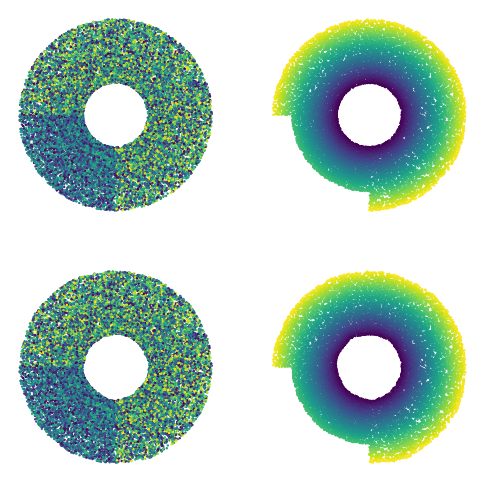

In [64]:
plt.figure(figsize=(6,6))
plt.subplot(2,2,1)
plt.axis("off")
plt.scatter(view_a[:, 0], view_a[:, 1], c=r_b, s=0.5)

plt.subplot(2,2,2)
plt.axis("off")
plt.scatter(view_b[:, 0], view_b[:, 1], c=r_b, s=0.5)


a_hat = a_hat.detach().cpu().numpy()
b_hat = b_hat.detach().cpu().numpy()

plt.subplot(2,2,3)
plt.axis("off")
plt.scatter(a_hat[:, 0], a_hat[:, 1], c=r_b, s=0.5)

plt.subplot(2,2,4)
plt.axis("off")
plt.scatter(b_hat[:, 0], b_hat[:, 1], c=r_b, s=0.5)

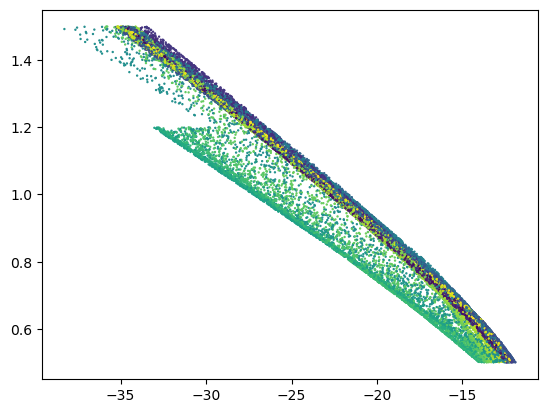

In [65]:
plt.scatter(z_b.detach().cpu().numpy(), r_b, c=theta, s=0.5)

(-39.61026883125305, -10.590390920639038)

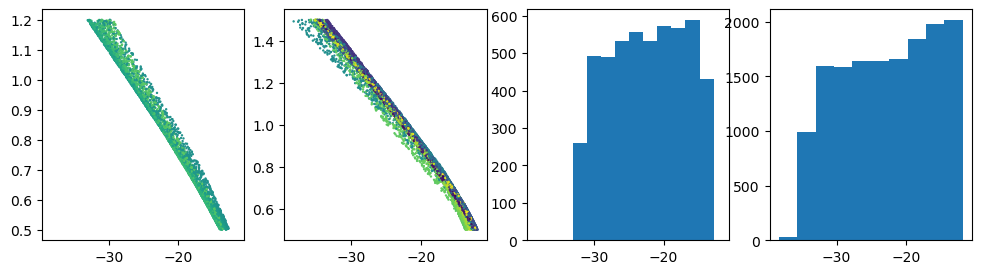

In [66]:
missing_inds = np.argwhere((theta > np.pi) & (theta < 1.5*np.pi)).flatten()
nonmissing_inds = np.argwhere(~((theta > np.pi) & (theta < 1.5*np.pi))).flatten()
plt.figure(figsize=(12, 3))

plt.subplot(1,4,2)
plt.scatter(z_b[nonmissing_inds].detach().cpu().numpy(), r_b[nonmissing_inds], c=theta[nonmissing_inds], s=0.5, vmin=0, vmax=2*np.pi)
xlim = plt.xlim()


plt.subplot(1,4,1)
plt.scatter(z_b[missing_inds].detach().cpu().numpy(), r_b[missing_inds], c=theta[missing_inds], s=0.5, vmin=0, vmax=2*np.pi)
plt.xlim(xlim)

plt.subplot(1,4,3)
plt.hist(z_b[missing_inds].detach().cpu().numpy())
plt.xlim(xlim)

plt.subplot(1,4,4)
plt.hist(z_b[nonmissing_inds].detach().cpu().numpy())
plt.xlim(xlim)

In [67]:
radii = np.arange(0.5, 1.7, 0.2)  # From 0.5 to 1.5 inclusive with step 0.2
r_contours = []

for radius in radii:
    # Find the index of the closest r_b to our target radius
    r_ind = np.argsort(np.abs(r_b - radius))[0]
    
    # Get the latent representations
    theta_lat = model.F_a2b(torch.Tensor(view_a).to(device))
    r_lat = model.F_b(torch.Tensor(view_b[r_ind,:]).to(device))
    r_lat = r_lat.repeat(theta_lat.size(0), 1)
    
    # Reconstruct from the latent space
    contour = model.G_b(torch.cat([r_lat, theta_lat], dim=1))
    contour = contour.detach().cpu().numpy()
    
    r_contours.append(contour)

# # Now let's create contour lines for different theta values
thetas = np.arange(0, 2*np.pi, np.pi/4)  # From 0 to 2π in increments of π/4
theta_contours = []

for angle in thetas:
    # Find the index of the closest theta to our target angle
    theta_ind = np.argsort(np.abs(theta - angle))[0]
    
    # Get the latent representations
    r_lat = model.F_b(torch.Tensor(view_b).to(device))
    theta_lat = model.F_a2b(torch.Tensor(view_a[theta_ind,:]).to(device))
    theta_lat = theta_lat.repeat(r_lat.size(0), 1)
    
    # Reconstruct from the latent space
    contour = model.G_b(torch.cat([r_lat, theta_lat], dim=1))
    contour = contour.detach().cpu().numpy()
    
    theta_contours.append(contour)

(-1.6525034308433533,
 1.7916907668113708,
 -1.7276707351207734,
 1.7640425622463227)

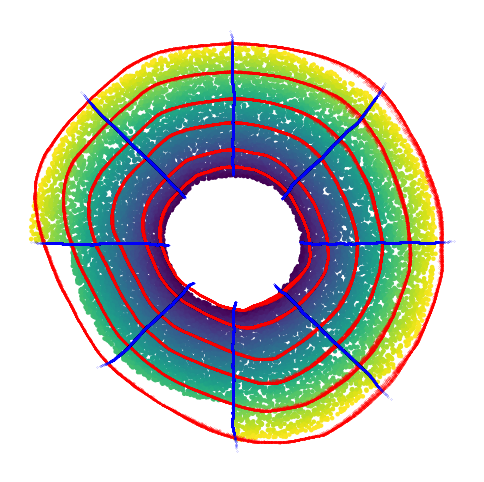

In [68]:
plt.figure(figsize=(6,6))
plt.scatter(b_hat[:, 0], b_hat[:, 1], c=r_b, s=5)
for contour in r_contours:
    plt.scatter(contour[:, 0], contour[:, 1], c='r', s=0.01)
for contour in theta_contours:
    plt.scatter(contour[:, 0], contour[:, 1], c='b', s=0.01)
plt.axis("off")